# Loan Data by Prosper
## by Wisatat

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate, current loan status, borrower income, and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#get better quality for visualization
%config InlineBackend.figure_format = 'retina'

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# loan_location = "C:/Users/earth/Dataset/Loan_Prosoer/prosperLoanData.csv"
# loan_location = "C:/Users/earth/Downloads/prosperLoanData.csv"
loan_location = "prosperLoanData.csv"
loan = pd.read_csv(loan_location)

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
loan.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            77543
Term                                       0
LoanStatus                                 0
ClosedDate                             54514
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                    0
EstimatedLoss                              0
EstimatedReturn                            0
ProsperRating (numeric)                    0
ProsperRating (Alpha)                      0
ProsperScore                               0
ListingCategory (numeric)                  0
BorrowerState                              0
Occupation                              1327
EmploymentStatus                           0
EmploymentStatusDuration                   0
IsBorrowerHomeowner                        0
CurrentlyI

In [7]:
loan = loan[loan['ProsperScore'].isnull()==False]
loan = loan[loan['EmploymentStatusDuration'].isnull()==False]
loan = loan[loan['DebtToIncomeRatio'].isnull()==False]

### What is the structure of your dataset?

> The dataset has 113,937 loans with 81 features. Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figureing out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> BorrowerAPR, LoanStatus, Occupation
, EmploymentStatus
, EmploymentStatusDuration
, ProsperScore
, IncomeRange
, DebtToIncomeRatio
, IncomeVerifiable
, Recommendations
, AvailableBankcardCredit

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

##### I'll start by detailing at the distribution of the BorrowerAPR.

In [8]:
loan['BorrowerAPR'].describe()

count    77543.000000
mean         0.223727
std          0.079159
min          0.045830
25%          0.161750
50%          0.215660
75%          0.287800
max          0.423950
Name: BorrowerAPR, dtype: float64

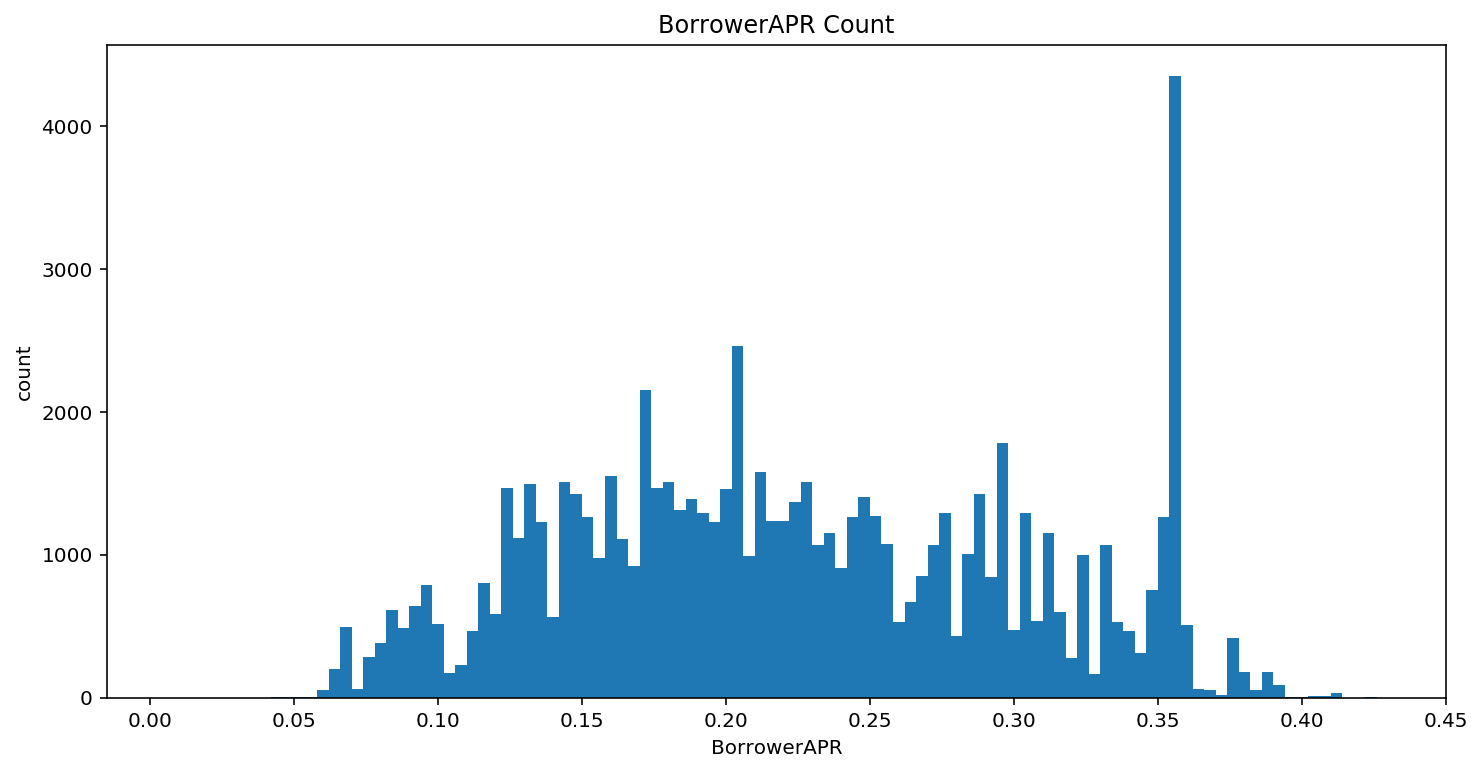

In [9]:
# create the histogram for BorrowerAPR

plt.figure(figsize = [12, 6]) 

#BorrowerAPR histogram
bins = np.arange(0.006, loan['BorrowerAPR'].max()+0.004, 0.004)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xticks(np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.05));

plt.title('BorrowerAPR Count')
plt.xlabel('BorrowerAPR')
plt.ylabel('count');

The distribution of BorrowerAPR looks multimodal. It is interesting that there is a small peak around to 0.175, 0.2 and 0.3, a large peak to around 0.35.

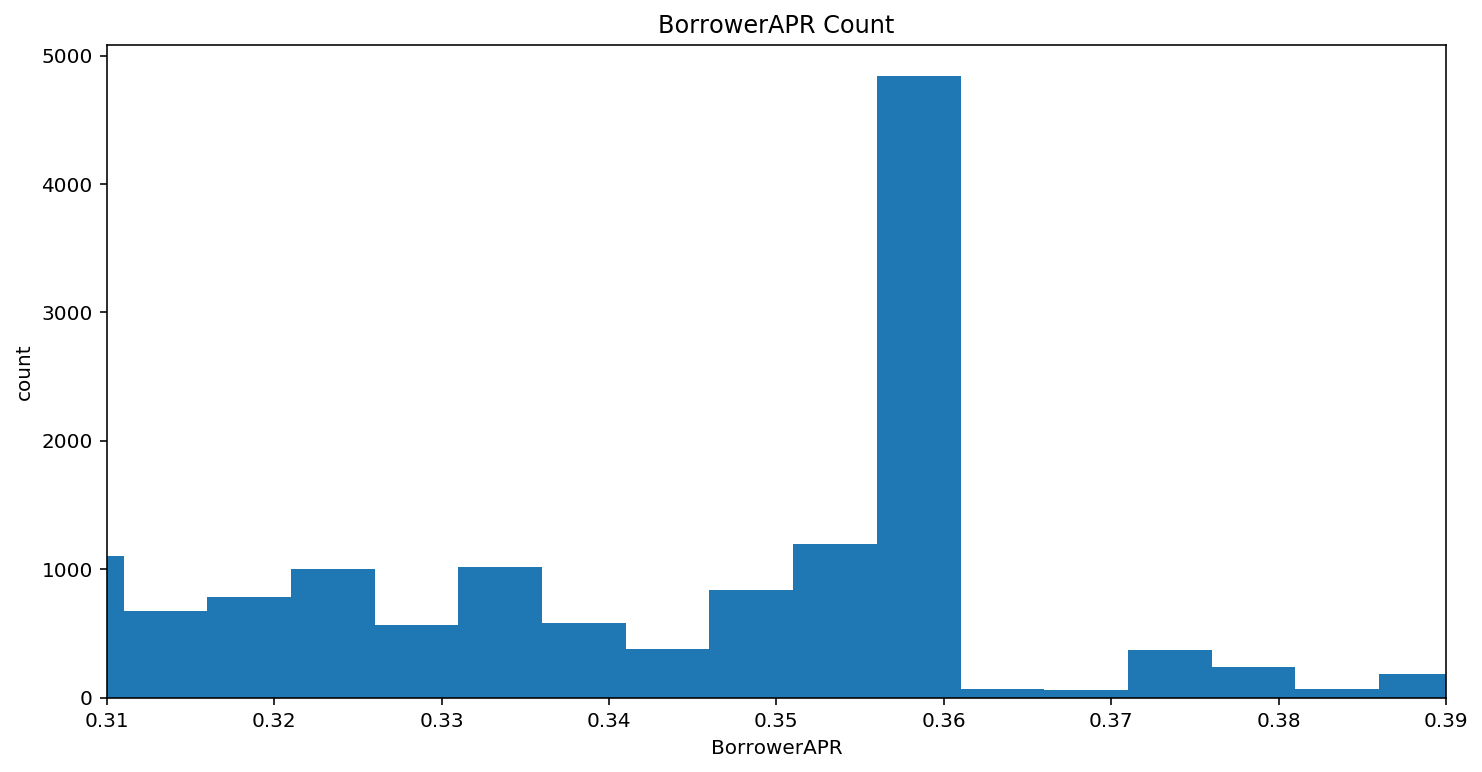

In [10]:
# create the histogram for BorrowerAPR

plt.figure(figsize = [12, 6]) 

#BorrowerAPR histogram
bins = np.arange(0.006, loan['BorrowerAPR'].max()+0.004, 0.005)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xlim([0.31,0.39])

plt.title('BorrowerAPR Count')
plt.xlabel('BorrowerAPR')
plt.ylabel('count');

Additionally, there is a very shape peak between 0.35 and 0.36.

##### The next detailing is the distribution of the Loan Status.

In [11]:
LoanStatus_counts = loan['LoanStatus'].value_counts()
LoanStatus_counts

Current                   52468
Completed                 17700
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        722
Past Due (31-60 days)       327
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       242
FinalPaymentInProgress      189
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [12]:
LoanStatus_order = LoanStatus_counts.index
LoanStatus_order

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'Past Due (61-90 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'],
      dtype='object')

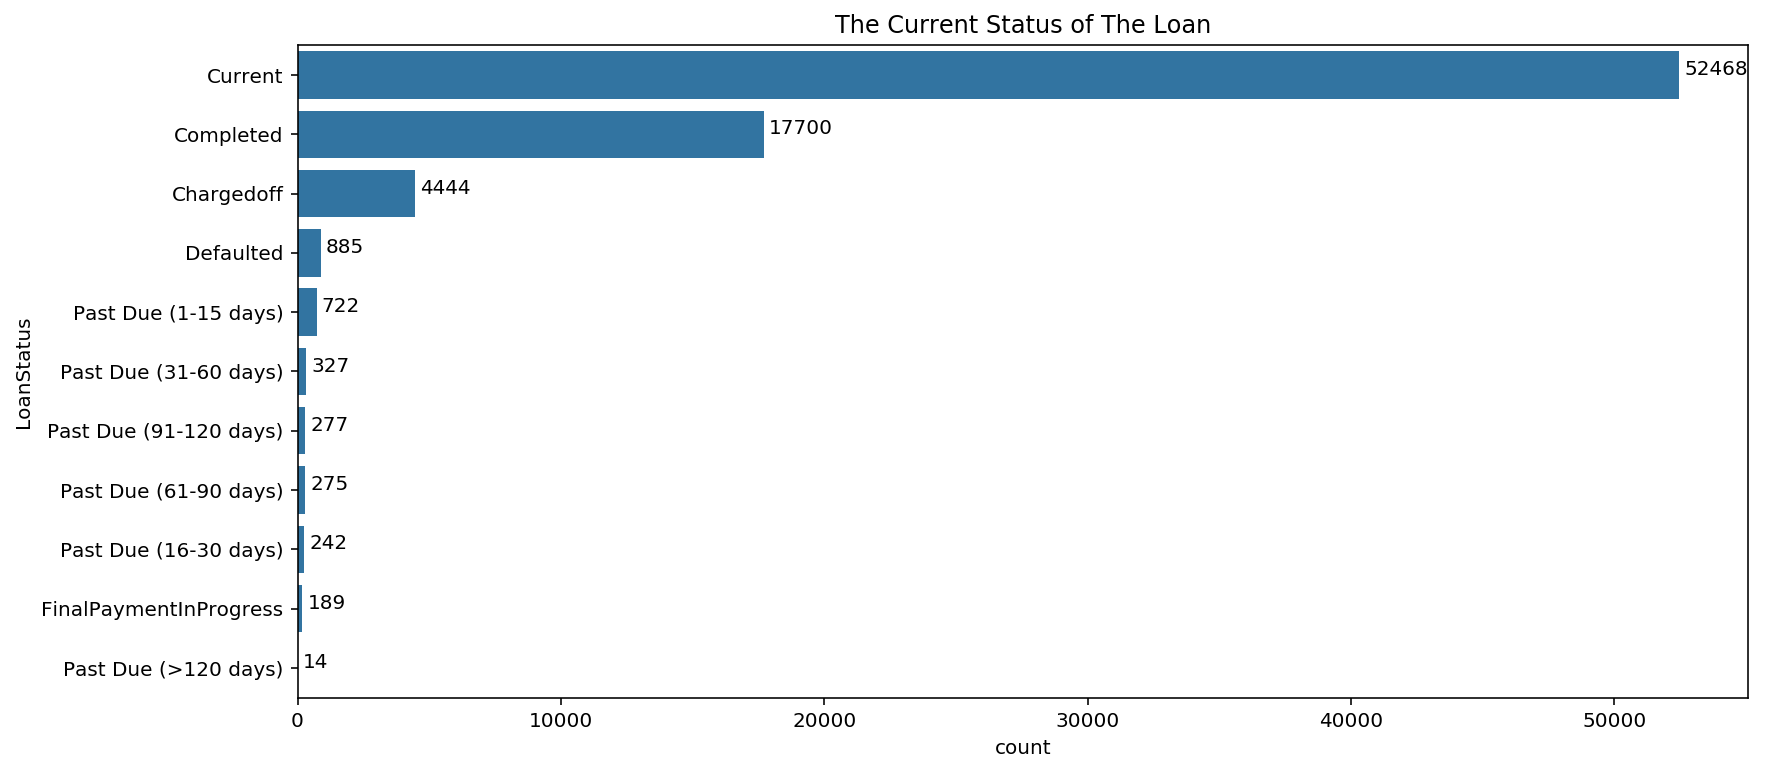

In [13]:
plt.figure(figsize=[13, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, y = 'LoanStatus', color = base_color, order=LoanStatus_order);
plt.title('The Current Status of The Loan');

# display the value of each bar
# https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python
for index, value in enumerate(LoanStatus_counts):
    plt.text(value+200, index, str(value))

If we looking at the figure, some categories of Loan Status are really almost zero, such as Cancelled and Past Due (>120 days).

It can conclude that the main categories of Loan Status are Completed, Current and chargeoff. (The categories has > 10000 count)

##### The next feature is the top 10 occupation

In [14]:
loan['Occupation'].value_counts()

Other                                 18501
Professional                           9916
Executive                              3206
Computer Programmer                    3038
Teacher                                2777
Analyst                                2683
Administrative Assistant               2603
Accountant/CPA                         2413
Nurse (RN)                             2121
Clerical                               2059
Skilled Labor                          2033
Sales - Commission                     1982
Retail Management                      1900
Sales - Retail                         1724
Police Officer/Correction Officer      1273
Truck Driver                           1218
Laborer                                1162
Civil Service                          1131
Engineer - Mechanical                  1098
Construction                           1052
Food Service Management                 935
Engineer - Electrical                   873
Medical Technician              

In [15]:
Occupation_counts = loan['Occupation'].value_counts()[:10]
Occupation_counts

Other                       18501
Professional                 9916
Executive                    3206
Computer Programmer          3038
Teacher                      2777
Analyst                      2683
Administrative Assistant     2603
Accountant/CPA               2413
Nurse (RN)                   2121
Clerical                     2059
Name: Occupation, dtype: int64

In [16]:
Occupation_order = Occupation_counts.index
Occupation_order

Index(['Other', 'Professional', 'Executive', 'Computer Programmer', 'Teacher',
       'Analyst', 'Administrative Assistant', 'Accountant/CPA', 'Nurse (RN)',
       'Clerical'],
      dtype='object')

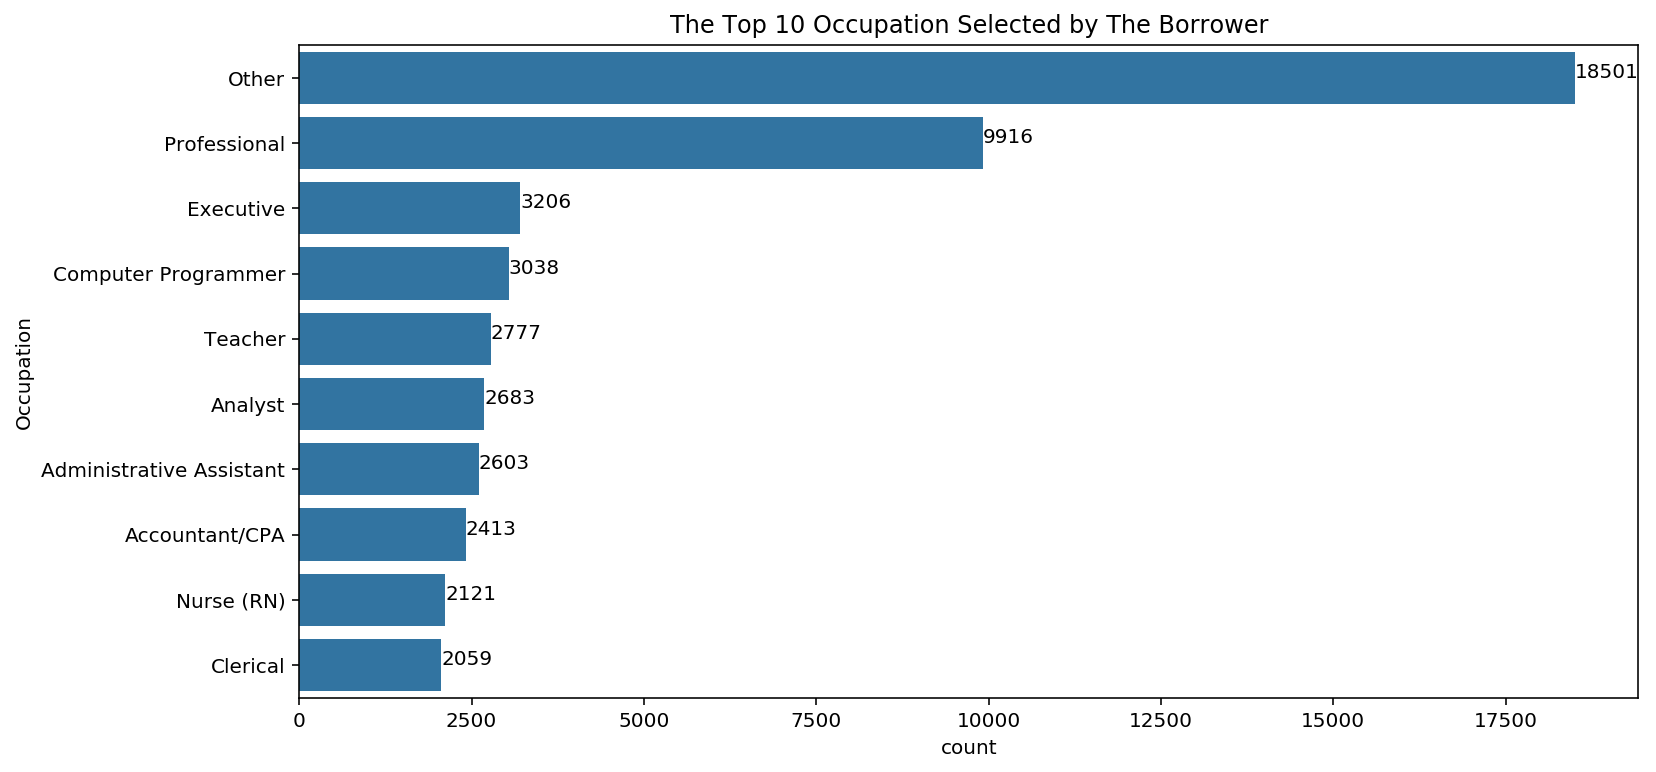

In [17]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, y = 'Occupation', color = base_color, order=Occupation_order);
plt.title('The Top 10 Occupation Selected by The Borrower');

# display the value of each bar
for index, value in enumerate(Occupation_counts):
    plt.text(value, index, str(value))

The most 2 occupation of top 10 borrowers enter their occupations as Others or Professional, due to they might not want to share the information. The rest of the occupations do not show big increase compare to others.

In [18]:
Occupation_counts_10 = loan['Occupation'].value_counts()[2:12]
Occupation_counts_10
Occupation_order_10 = Occupation_counts_10.index
Occupation_order_10

Index(['Executive', 'Computer Programmer', 'Teacher', 'Analyst',
       'Administrative Assistant', 'Accountant/CPA', 'Nurse (RN)', 'Clerical',
       'Skilled Labor', 'Sales - Commission'],
      dtype='object')

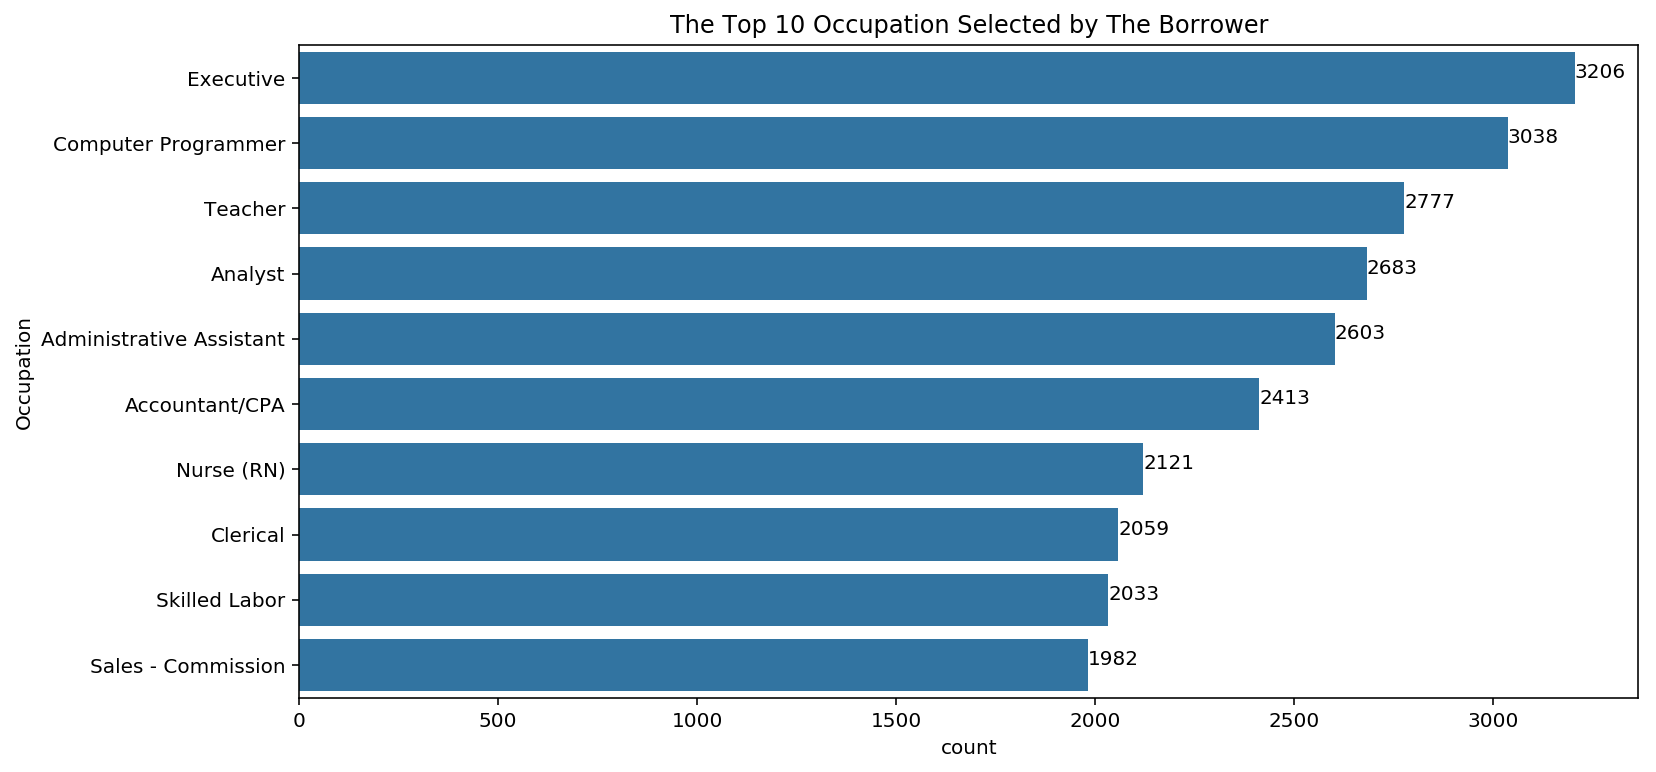

In [19]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, y = 'Occupation', color = base_color, order=Occupation_order_10);
plt.title('The Top 10 Occupation Selected by The Borrower');

# display the value of each bar
for index, value in enumerate(Occupation_counts_10):
    plt.text(value, index, str(value))

The most 2 occupation of top 10 borrowers enter their occupations that without Others and Professional are Executive, Computer Programmer, Teacher,Analyst, Administrative Assistant, Accountant/CPA, Nurse (RN), Clerical, Skilled Labor and Sales - Commission

##### The next feature is EmploymentStatus

In [20]:
loan['EmploymentStatus'].value_counts()

Employed         65883
Full-time         7578
Other             3520
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

In [21]:
EmploymentStatus_counts = loan['EmploymentStatus'].value_counts()
EmploymentStatus_order = EmploymentStatus_counts.index
EmploymentStatus_order

Index(['Employed', 'Full-time', 'Other', 'Retired', 'Part-time',
       'Self-employed', 'Not employed'],
      dtype='object')

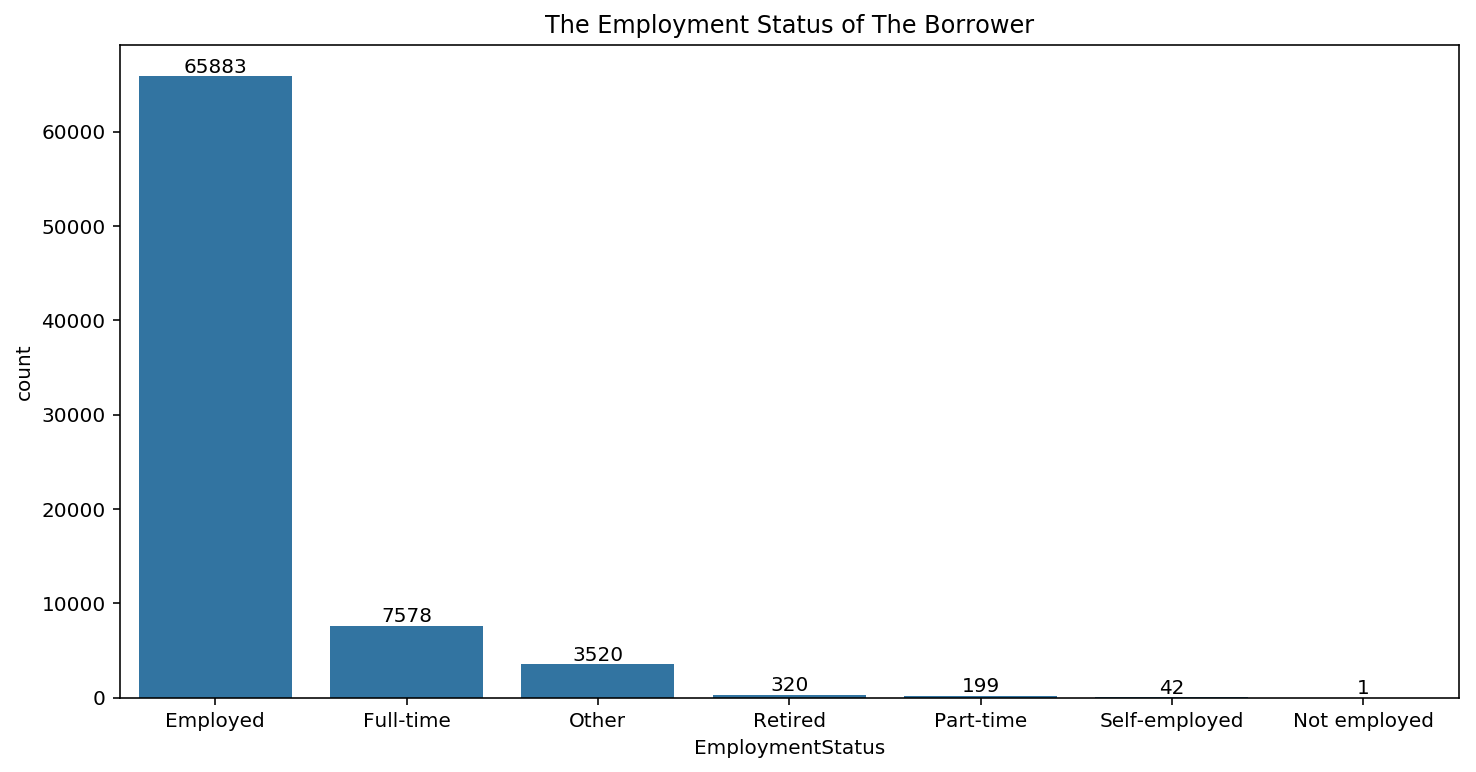

In [22]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, x = 'EmploymentStatus', color = base_color, order=EmploymentStatus_order);
plt.title('The Employment Status of The Borrower');

# display the value of each bar
for index, value in enumerate(EmploymentStatus_counts):
    plt.text(index, value+400, str(value), ha = 'center')

As the figure above, the employment status of the borrowers are employed, at 65,833. The other categiories are less than 10,000.

##### Next up, the distribution of EmploymentStatusDuration.

In [23]:
EmploymentStatusDuration_counts = loan['EmploymentStatusDuration'].value_counts().sort_index()
EmploymentStatusDuration_order = EmploymentStatusDuration_counts.index
EmploymentStatusDuration_order

Float64Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,
                9.0,
              ...
              653.0, 662.0, 672.0, 678.0, 685.0, 690.0, 731.0, 733.0, 745.0,
              755.0],
             dtype='float64', length=595)

In [24]:
loan[['EmploymentStatusDuration']].describe()

,EmploymentStatusDuration
count,77543.000000
mean,104.240757
std,96.790960
min,0.000000
25%,31.000000
50%,75.000000
75%,149.000000
max,755.000000


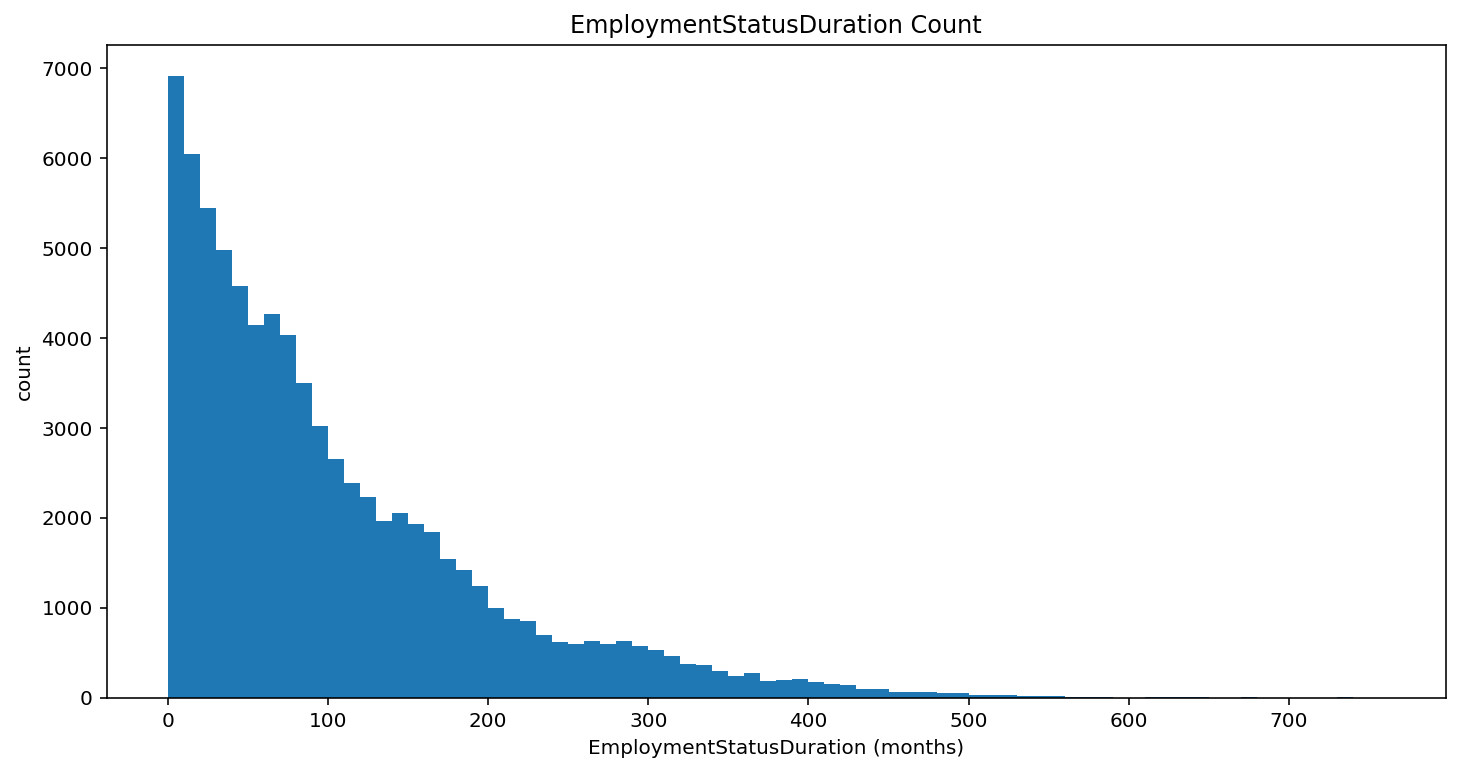

In [25]:
# create the histogram for EmploymentStatusDuration

plt.figure(figsize = [12, 6]) 

#EmploymentStatusDuration histogram
bins = np.arange(0, loan['EmploymentStatusDuration'].max()+10, 10)
plt.hist(data = loan, x = 'EmploymentStatusDuration', bins = bins)

plt.title('EmploymentStatusDuration Count')
plt.xlabel('EmploymentStatusDuration (months)')
plt.ylabel('count');

The distribution of EmploymentStatusDuration look highly skewed, with a very long tail of data points with large values.
I'll applying a logarithmic transform to the EmploymentStatusDuration, the distribution after applying a logarithmic transform should be a easier looking.

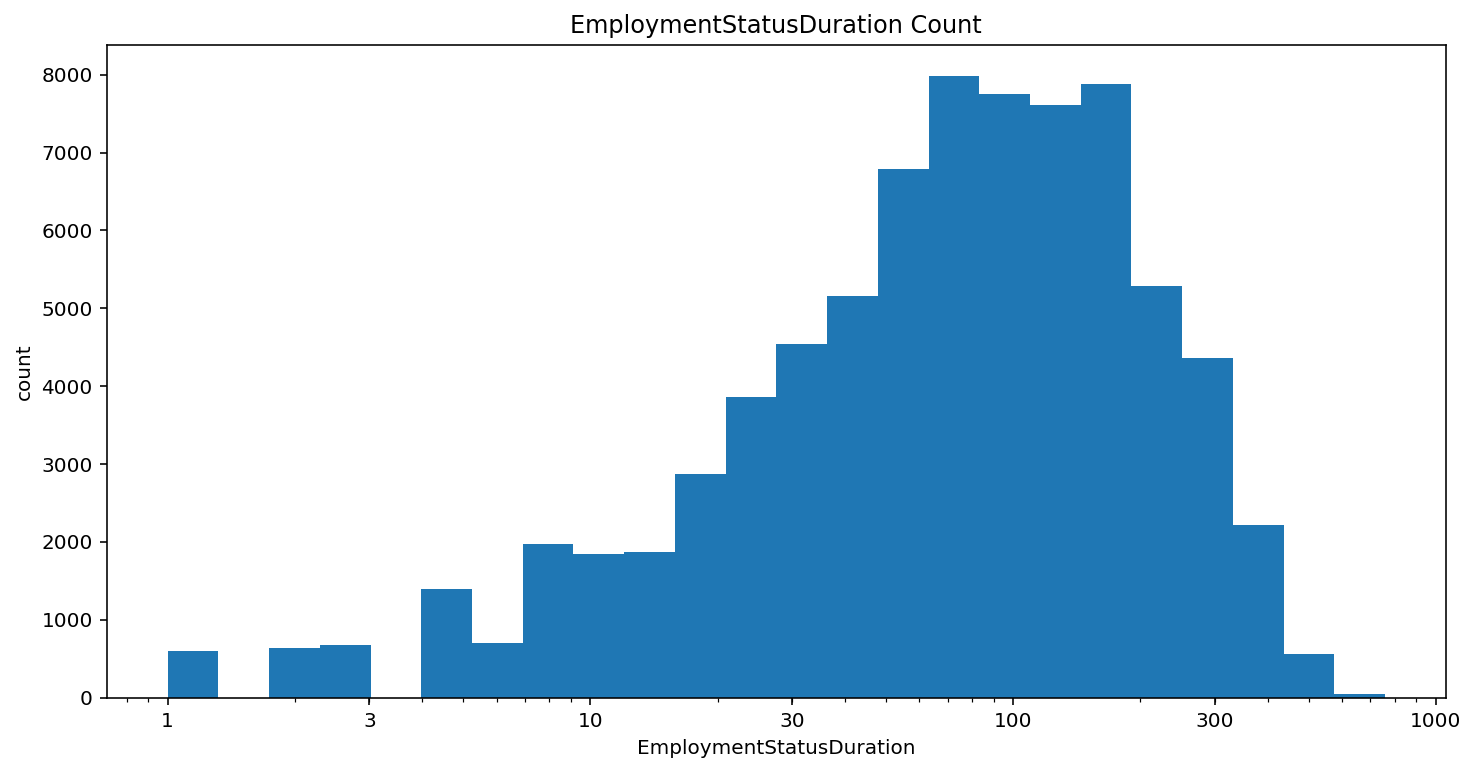

In [26]:
# create the histogram by taking log on EmploymentStatusDuration 

plt.figure(figsize = [12, 6]) 

#EmploymentStatusDuration histogram
bins = 10 ** np.arange(0, np.log10(loan['EmploymentStatusDuration'].max())+0.12, 0.12)
plt.hist(data = loan, x = 'EmploymentStatusDuration', bins = bins)

tick_locs = [1, 3, 10, 30, 100, 300, 1000]
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)

plt.title('EmploymentStatusDuration Count')
plt.xlabel('EmploymentStatusDuration')
plt.ylabel('count');

When plotting on a log-scale, the EmploymentStatusDuration distribution looks right skewed distribution with the highest peak between 50 and 200.

##### The next feature is ProsperScore.

In [27]:
ProsperScore_counts = loan['ProsperScore'].value_counts().sort_index()
ProsperScore_order = ProsperScore_counts.index
ProsperScore_order

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64')

In the index that have a score of 11, which should not be possible since the score just ranges from 1-10

In [28]:
loan = loan[loan['ProsperScore'] != 11]
ProsperScore_order = ProsperScore_counts.index
ProsperScore_order

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype='float64')

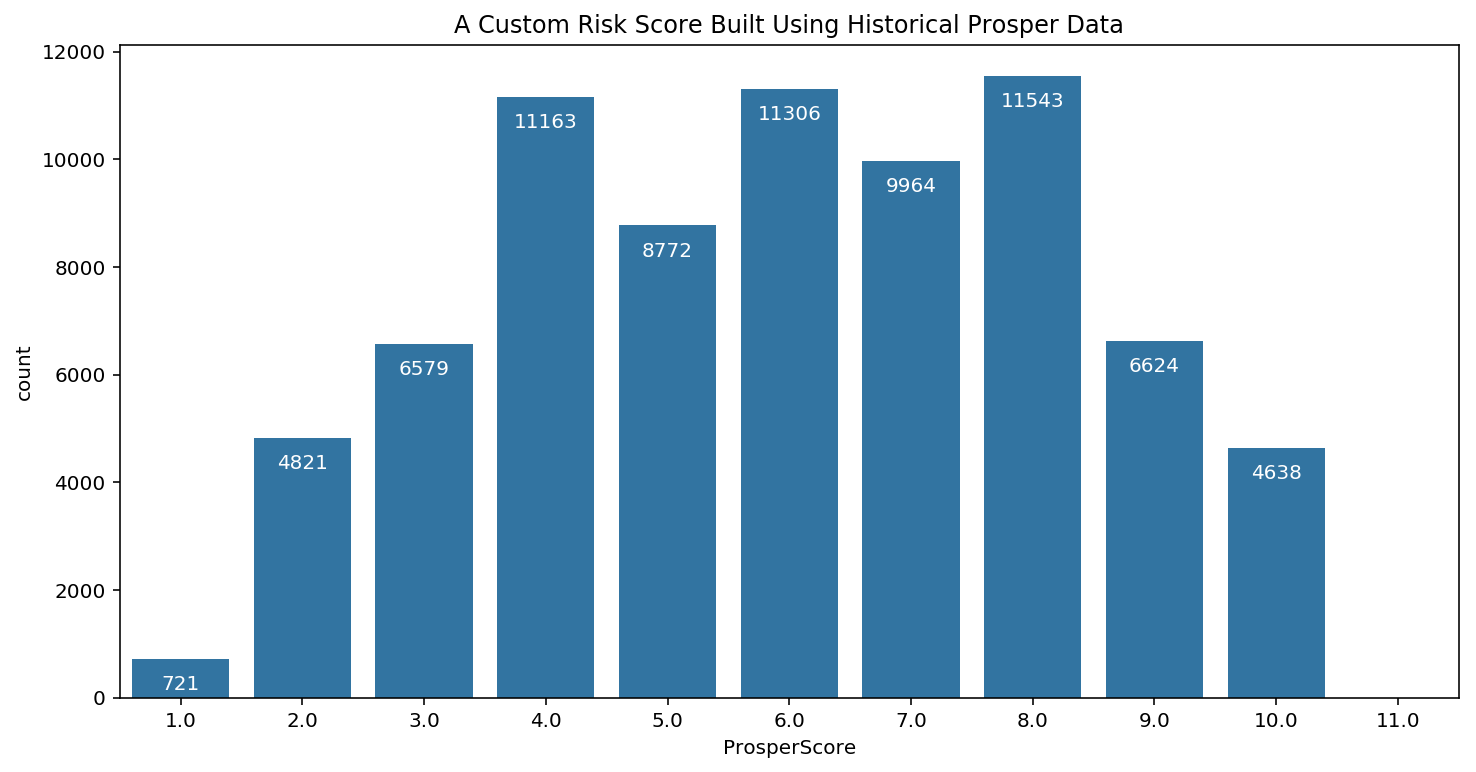

In [29]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, x = 'ProsperScore', color = base_color, order=ProsperScore_order);
plt.title('A Custom Risk Score Built Using Historical Prosper Data');

# display the value of each bar
for index, value in enumerate(ProsperScore_counts):
    plt.text(index, value-575, str(value), ha = 'center', color = 'w')

The figure shows that the highest of borrowers in ProsperScore is 4.0 at 12,593, then 6.0 and 7.0, at 12,774 and 12,052 respectively.

##### The next feature is IncomeRange.

In [30]:
loan['IncomeRange'] = loan['IncomeRange'].astype('category')
IncomeRange_order = ['Not displayed', 'Not employed', '$0', '$1-24,999',
                       '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']


IncomeRange_counts = loan['IncomeRange'].value_counts()

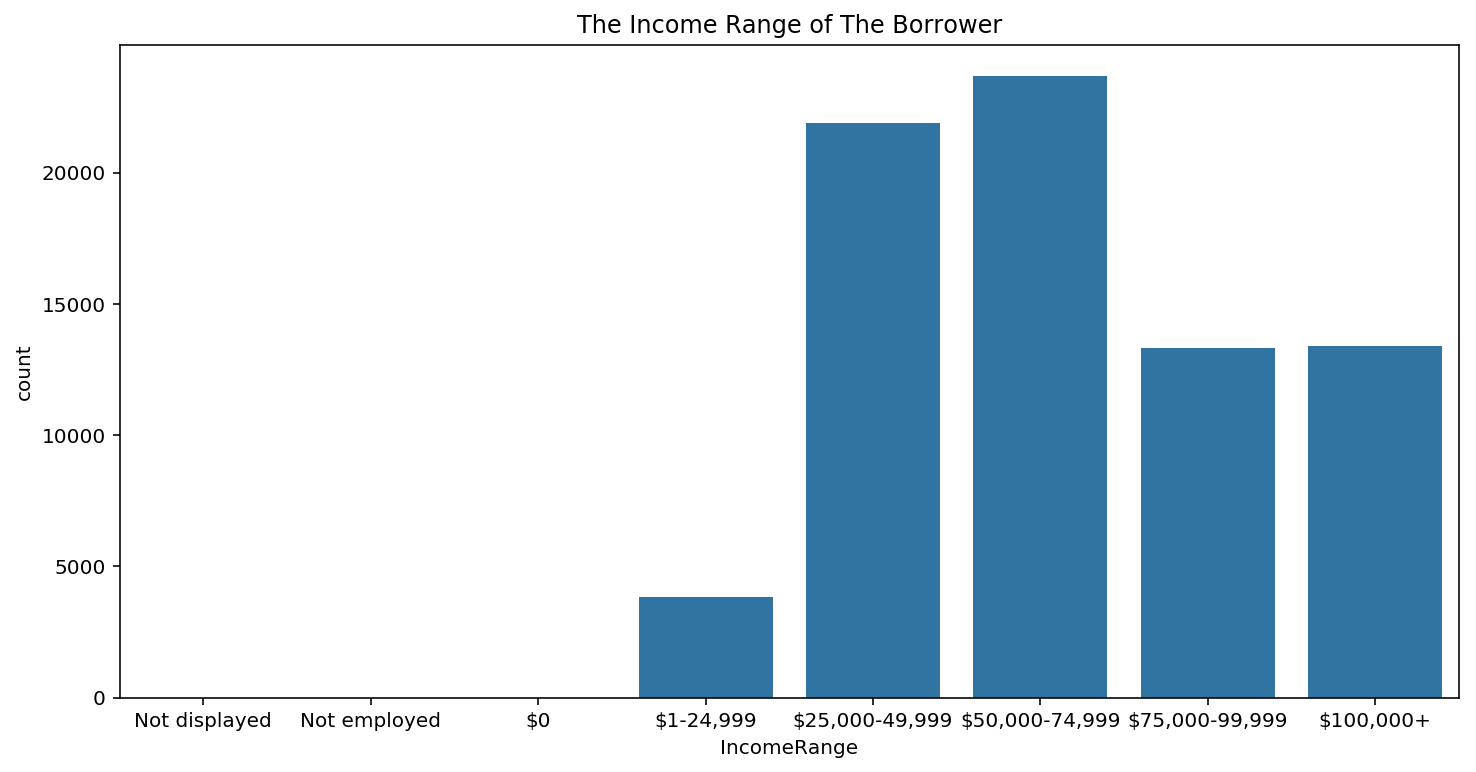

In [31]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, x = 'IncomeRange', color = base_color, order = IncomeRange_order);
plt.title('The Income Range of The Borrower');

It's definitely that most of borrowers are have income range of 25,000-49,999 and 50,000-74,999, similarly, on the second have 75,000-99,999 and 100,000+. On the other hand, another income ranges have the borrower lower than 10,000.

##### The next feature is DebtToIncomeRatio.

In [32]:
loan[['DebtToIncomeRatio']].describe()

,DebtToIncomeRatio
count,76131.000000
mean,0.259817
std,0.320932
min,0.000000
25%,0.150000
50%,0.220000
75%,0.320000
max,10.010000


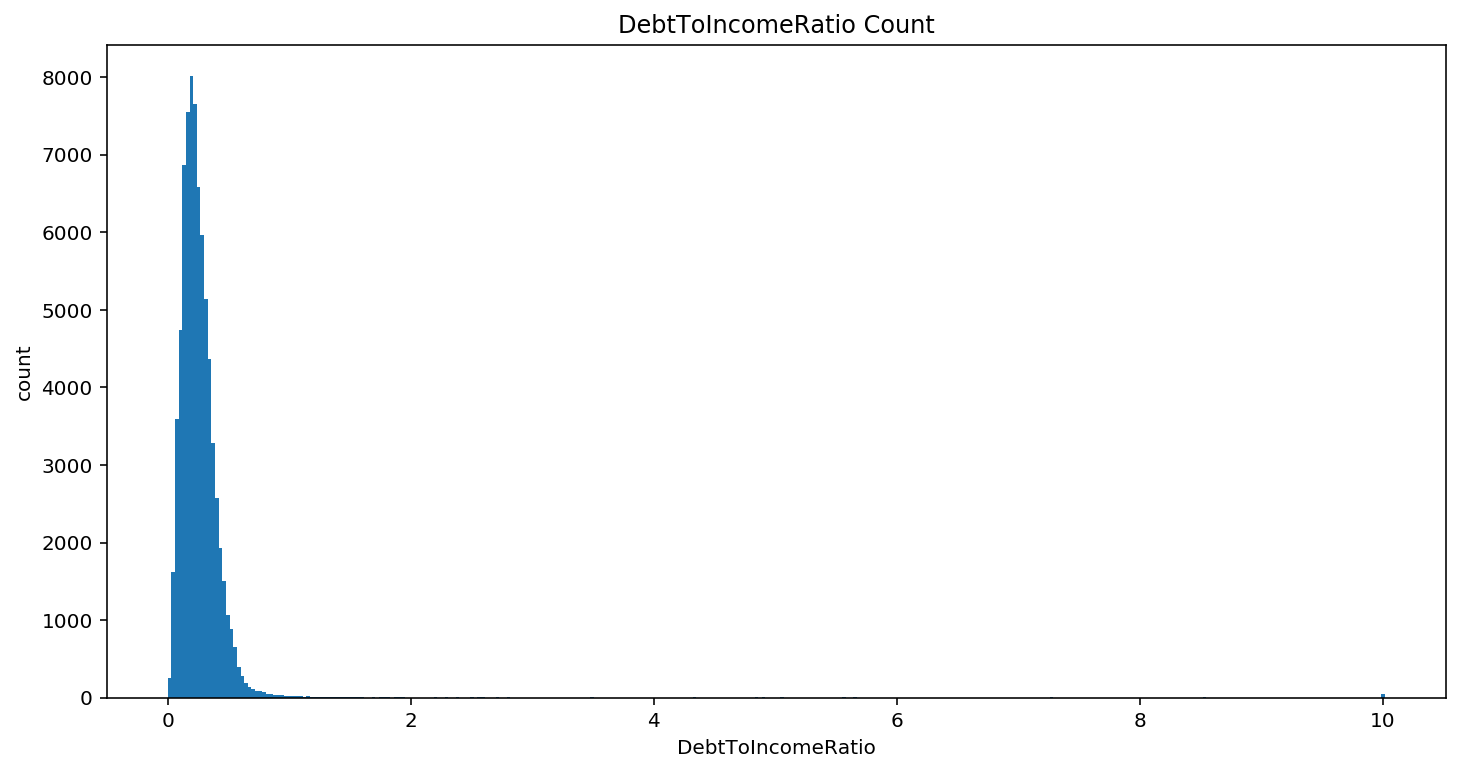

In [33]:
# create the histogram for DebtToIncomeRatio

plt.figure(figsize = [12, 6]) 

#DebtToIncomeRatio histogram
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.03, 0.03)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)

plt.title('DebtToIncomeRatio Count')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count');

In [34]:
# Total count DebtToIncomeRatio when ratio has lower than 1.5 and equal or higher than 1.5

print(loan.query("DebtToIncomeRatio > 1.5").shape[0])
print(loan.query("DebtToIncomeRatio <= 1.5").shape[0])

172
75959


The figure and total count with filtering 1.5 value in DebtToIncomeRatio show that most of the data is on left of DebtToIncomeRatio axis, maybe it has some outliers on the right. I'll try to plotting DebtToIncomeRatio that without these in the right figure below.

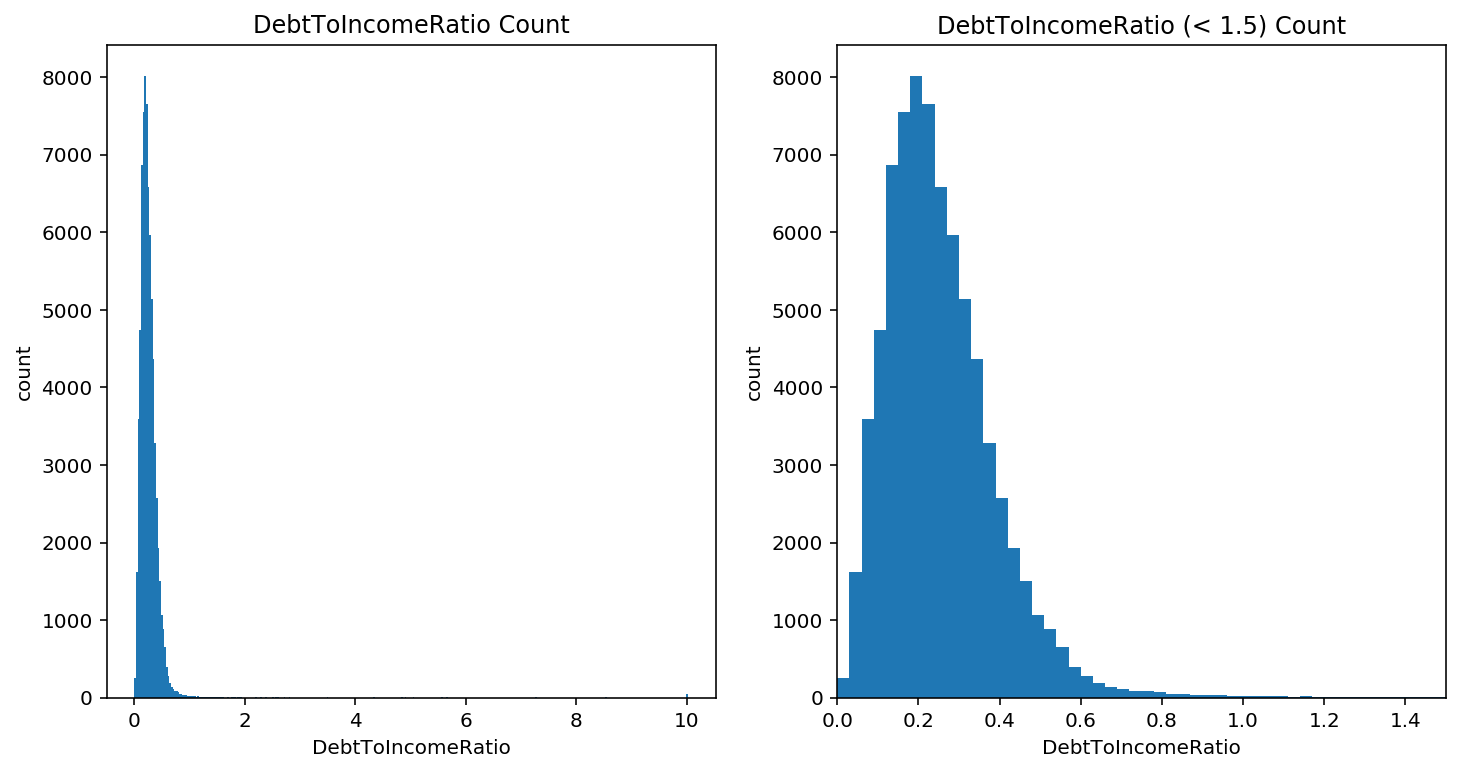

In [35]:
# create the histogram for DebtToIncomeRatio
plt.figure(figsize = [12, 6]) 


#DebtToIncomeRatio histogram
plt.subplot(1, 2, 1)
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.03, 0.03)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)

plt.title('DebtToIncomeRatio Count')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count');


#DebtToIncomeRatio < 1.5 histogram
plt.subplot(1, 2, 2)
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.03, 0.03)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)

plt.title('DebtToIncomeRatio (< 1.5) Count')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count');
plt.xlim(0, 1.5);

As you can see, DebtToIncomeRatio has a right-skewed distribution with a peak around 0.2

##### The next feature is IncomeVerifiable.

In [36]:
IncomeVerifiable_counts = loan['IncomeVerifiable'].value_counts()
IncomeVerifiable_order = IncomeVerifiable_counts.index
IncomeVerifiable_order

Index([True, False], dtype='object')

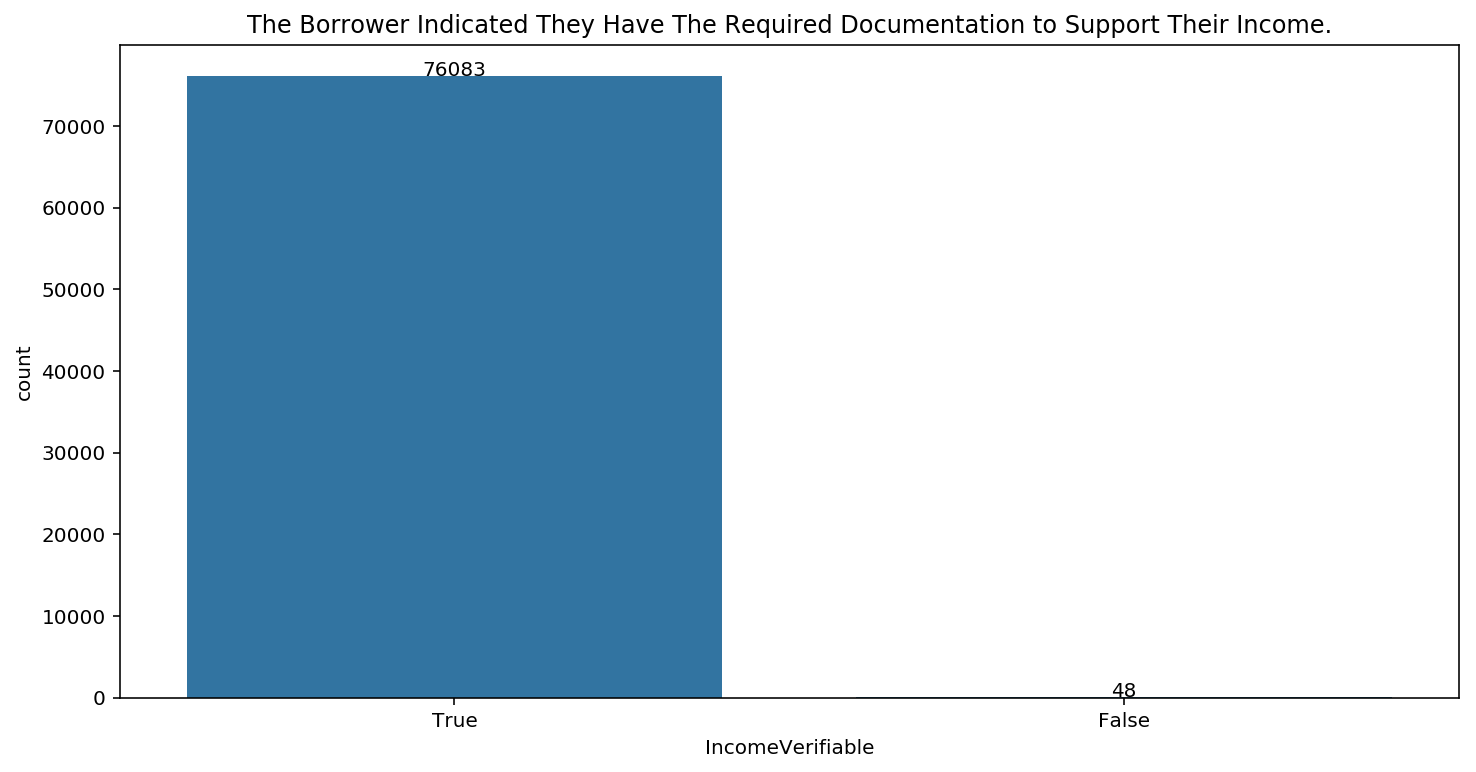

In [39]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, x = 'IncomeVerifiable', color = base_color, order=IncomeVerifiable_order);
plt.title('The Borrower Indicated They Have The Required Documentation to Support Their Income.');

# display the value of each bar
for index, value in enumerate(IncomeVerifiable_counts):
    plt.text(index, value, str(value), ha = 'center')

The figure shows that 76,083 borrowers have a IncomeVerifiable, on the other hand, 48 are don't.

##### The next feature is Recommendations.

In [40]:
Recommendations_counts = loan['Recommendations'].value_counts()
Recommendations_order = Recommendations_counts.index
Recommendations_order

Int64Index([0, 1, 2, 3, 18, 5, 4, 19, 9], dtype='int64')

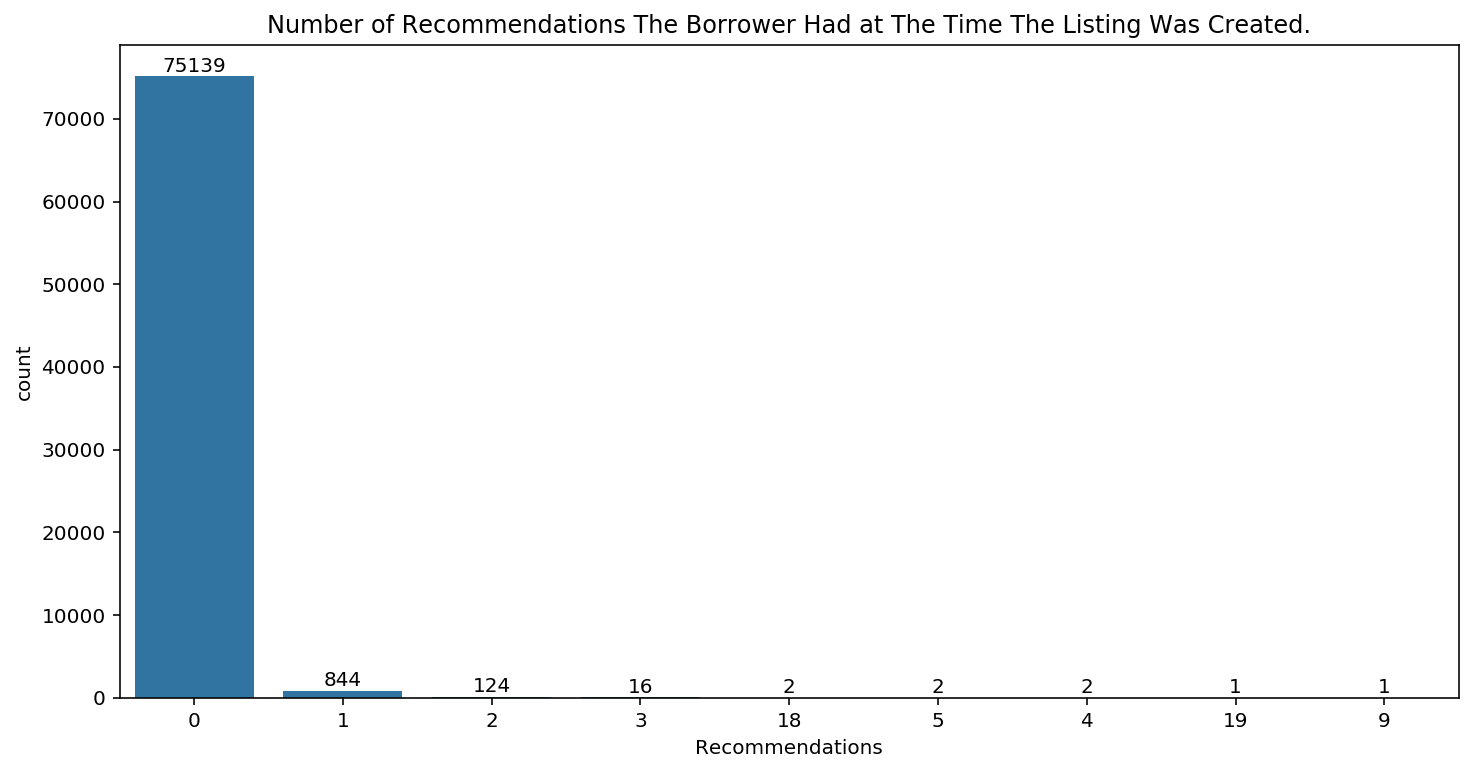

In [41]:
plt.figure(figsize=[12, 6])

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = loan, x = 'Recommendations', color = base_color, order=Recommendations_order);
plt.title('Number of Recommendations The Borrower Had at The Time The Listing Was Created.');

# display the value of each bar
for index, value in enumerate(Recommendations_counts):
    plt.text(index, value+600, str(value), ha = 'center')

In [42]:
loan['Recommendations'].describe()

count    76131.000000
mean         0.016051
std          0.186091
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: Recommendations, dtype: float64

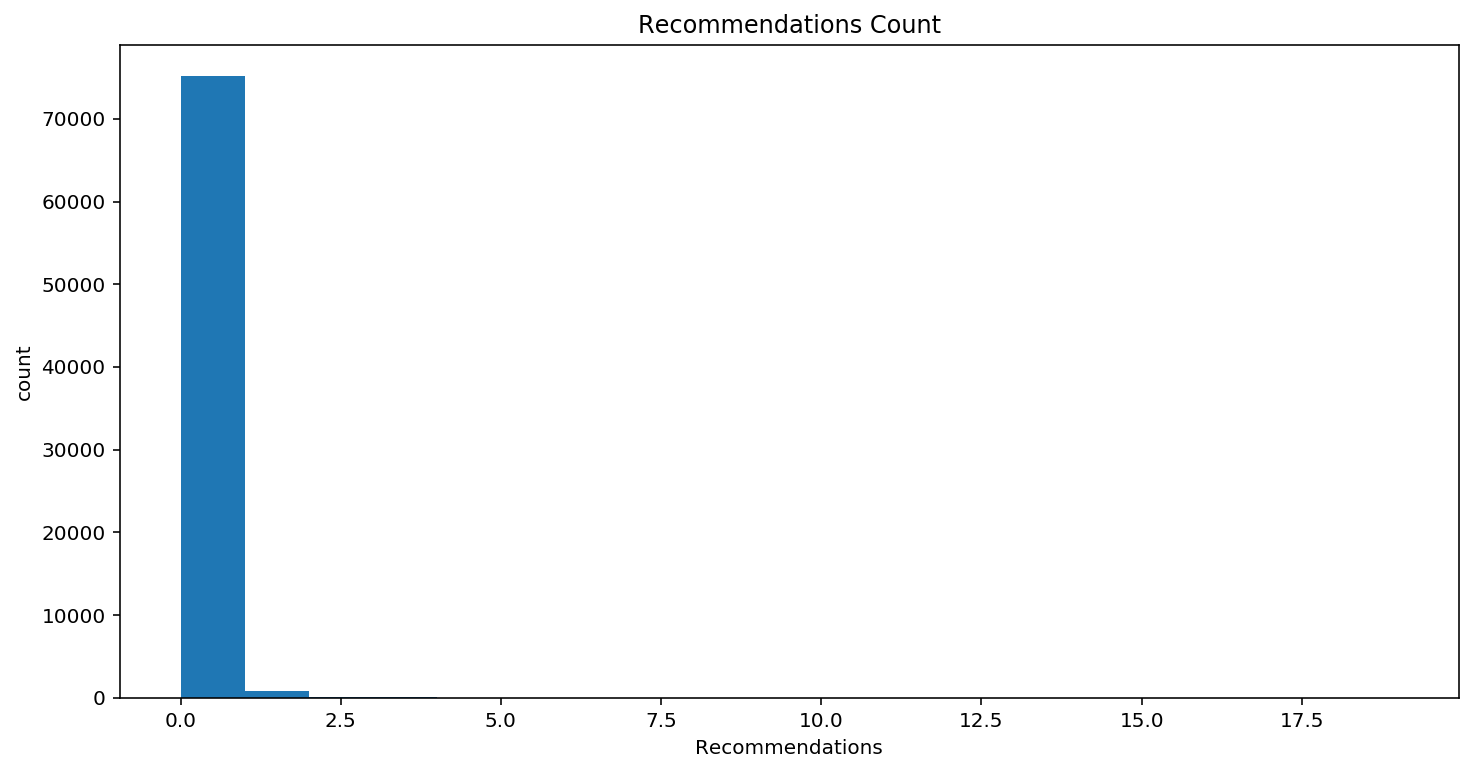

In [43]:
# create the histogram by taking log on Recommendations 

plt.figure(figsize = [12, 6]) 

#Recommendations histogram
bins = np.arange(0, loan['Recommendations'].max()+1, 1)
plt.hist(data = loan, x = 'Recommendations', bins = bins)

#plt.xscale('log')

plt.title('Recommendations Count')
plt.xlabel('Recommendations')
plt.ylabel('count');

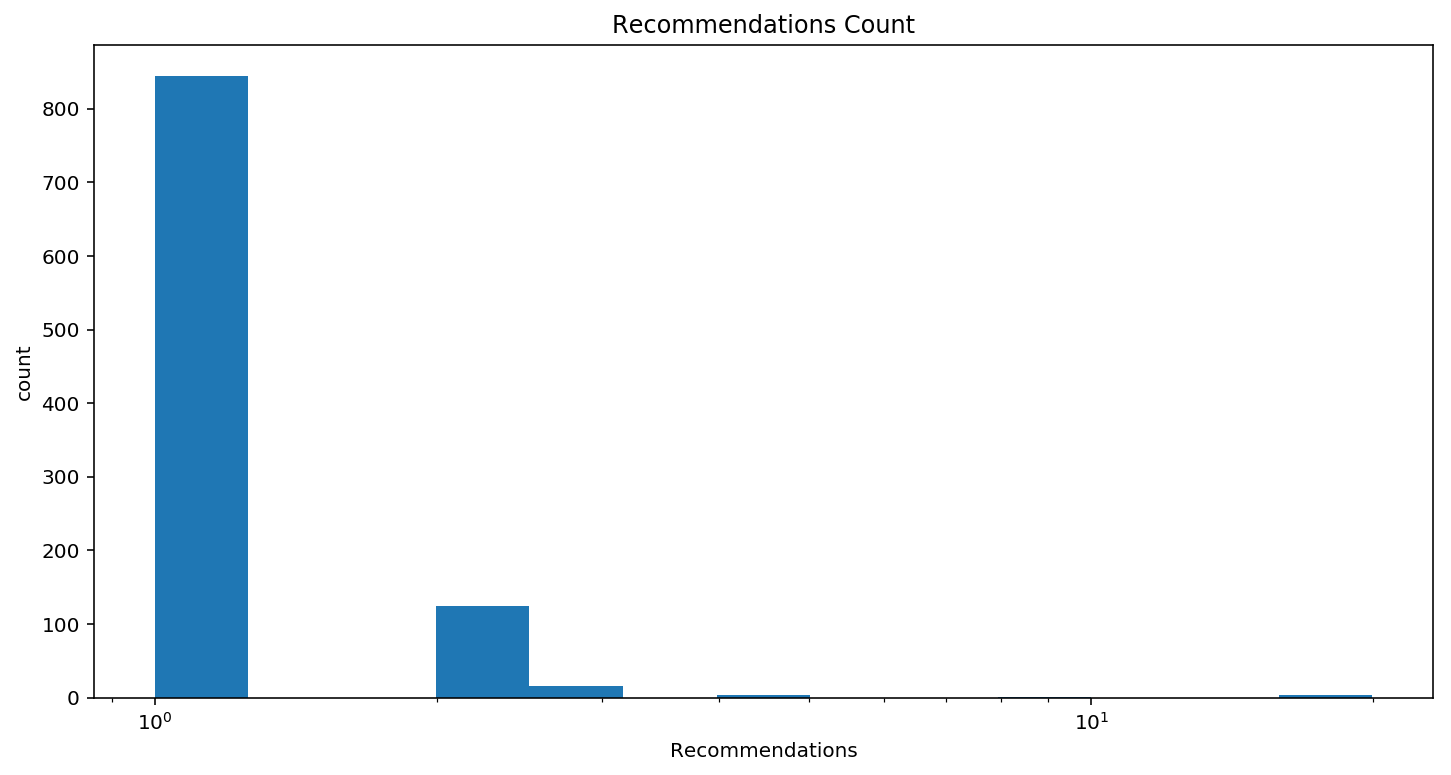

In [44]:
# create the histogram by taking log on Recommendations 

plt.figure(figsize = [12, 6]) 

#Recommendations histogram
bins = 10 ** np.arange(0, np.log10(loan['Recommendations'].max())+0.1, 0.1)
plt.hist(data = loan, x = 'Recommendations', bins = bins)

plt.xscale('log')

plt.title('Recommendations Count')
plt.xlabel('Recommendations')
plt.ylabel('count');

The figures show that most of loaners have no recommenders, however, it have a little of outliers.

In [48]:
# outliers of Recommendations
print(loan.query('Recommendations > 4').Recommendations.sum())
print(loan.query('Recommendations > 4').Recommendations)

74
27680      5
32063      5
94485     19
94683      9
106650    18
111736    18
Name: Recommendations, dtype: int64


##### The next feature is AvailableBankcardCredit.

In [49]:
loan[['AvailableBankcardCredit']].describe()

,AvailableBankcardCredit
count,76131.000000
mean,10705.801999
std,17592.166667
min,0.000000
25%,1080.000000
50%,4331.000000
75%,12976.000000
max,498374.000000


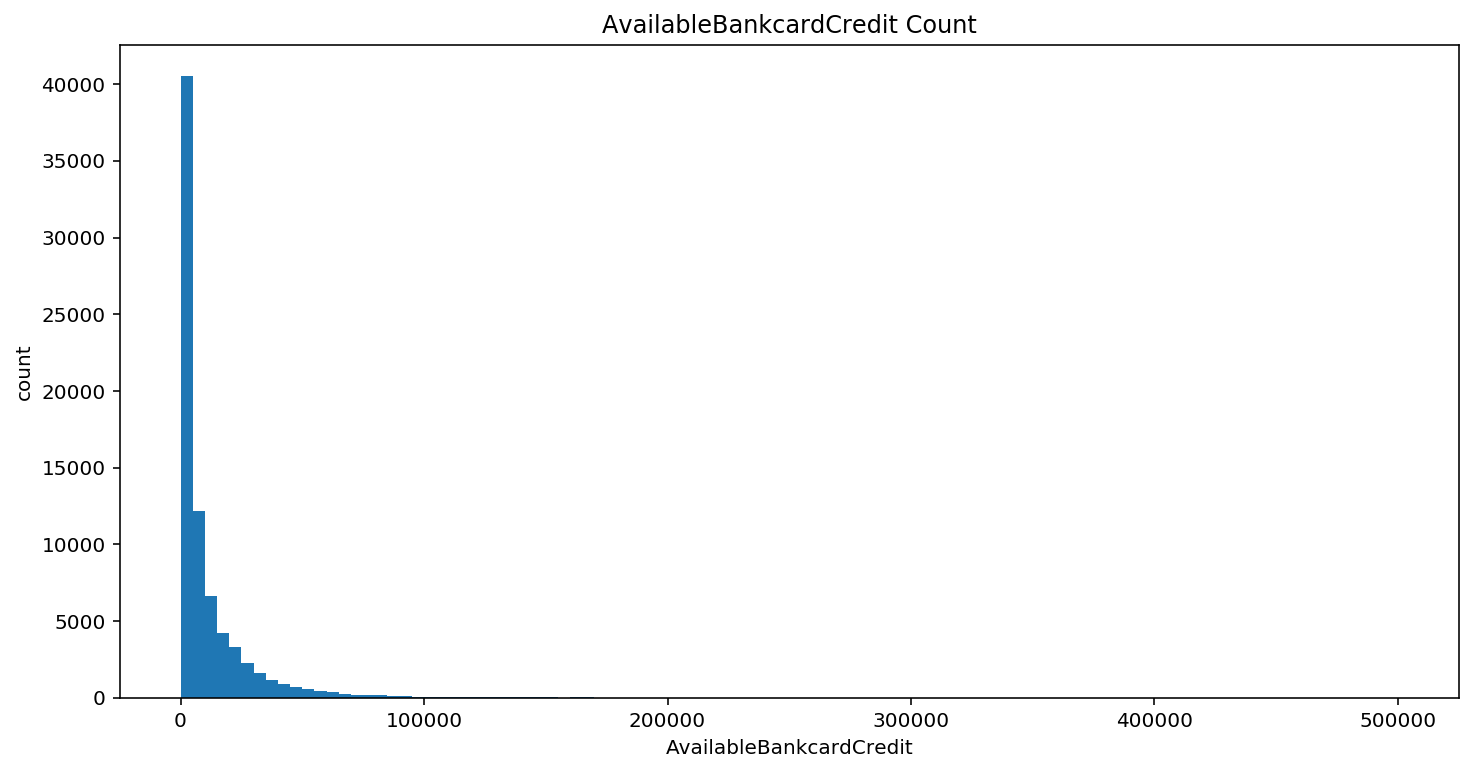

In [50]:
# create the histogram for DebtToIncomeRatio

plt.figure(figsize = [12, 6]) 

#DebtToIncomeRatio histogram
bins = np.arange(0, loan['AvailableBankcardCredit'].max()+5000, 5000)
plt.hist(data = loan, x = 'AvailableBankcardCredit', bins = bins)

plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');

The figure shows that most of the data is on left of AvailableBankcardCredit axis, maybe it has some outliers on the right. I'll try to plotting AvailableBankcardCredit that without these in the right figure below.

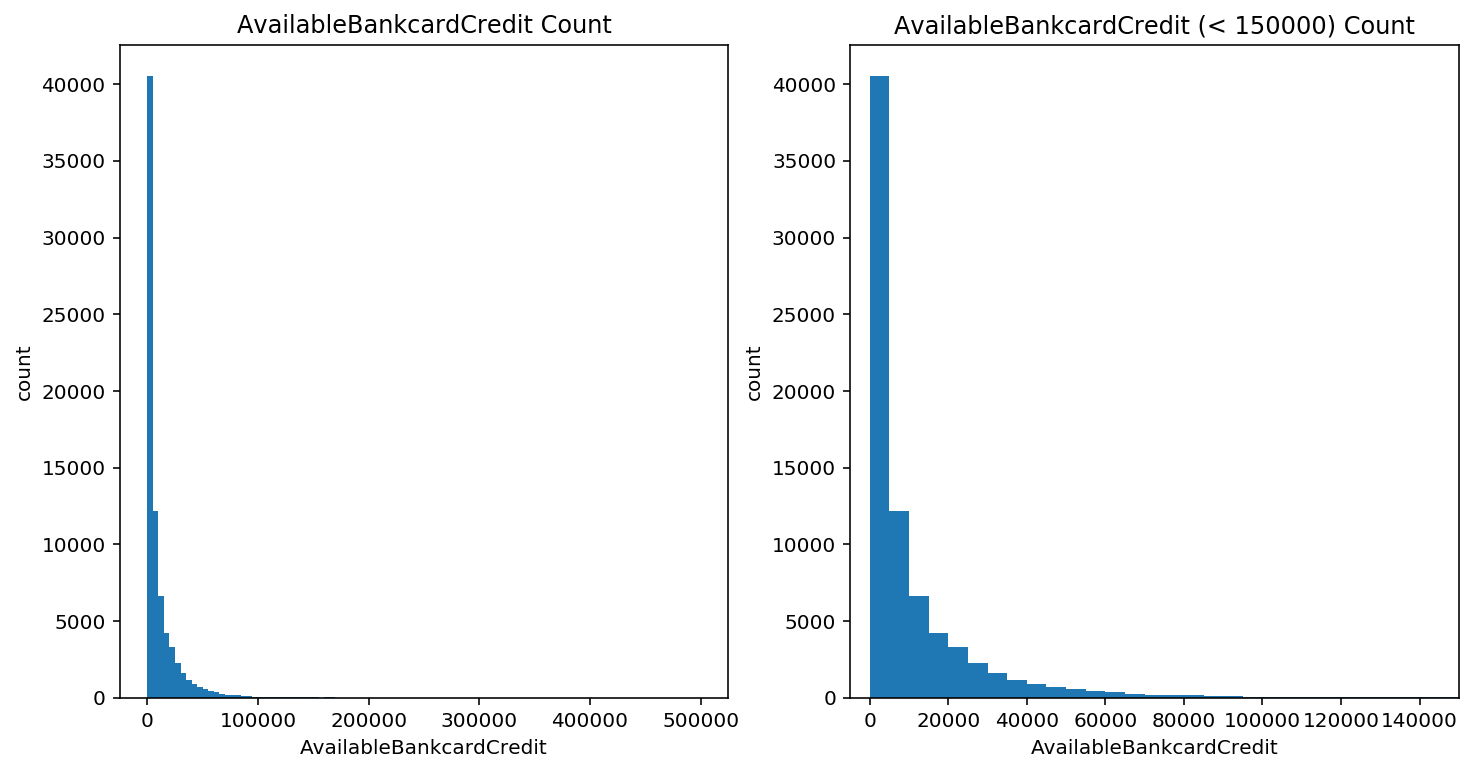

In [51]:
# create the histogram for AvailableBankcardCredit
plt.figure(figsize = [12, 6]) 


#AvailableBankcardCredit histogram
plt.subplot(1, 2, 1)
bins = np.arange(0, loan['AvailableBankcardCredit'].max()+5000, 5000)
plt.hist(data = loan, x = 'AvailableBankcardCredit', bins = bins)

plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');


#AvailableBankcardCredit < 100000 histogram
plt.subplot(1, 2, 2)
bins = np.arange(0, loan['AvailableBankcardCredit'].max()+5000, 5000)
plt.hist(data = loan, x = 'AvailableBankcardCredit', bins = bins)

plt.title('AvailableBankcardCredit (< 150000) Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');
plt.xlim(-5000, 150000);

As you can see, AvailableBankcardCredit has a highly right-skewed distribution.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.35 and 0.36. There are unusual points in EmploymentStatusDuration and Recommendations, so I need to perform a log transformations to check them.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions of EmploymentStatusDuration and Recommendations are highly right skewed, so I transform them with a log transformation and surprising that Recommendations is still a high right skewed, but EmploymentStatusDuration is changed to left skewed. I remove ProsperScore is equal to 11 because the score ranges from ProsperScore is must be 1-10.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in the data. I'll start betewwn quantitative variable and quantitative variable.

##### Quantitative Variable vs Quantitative Variable

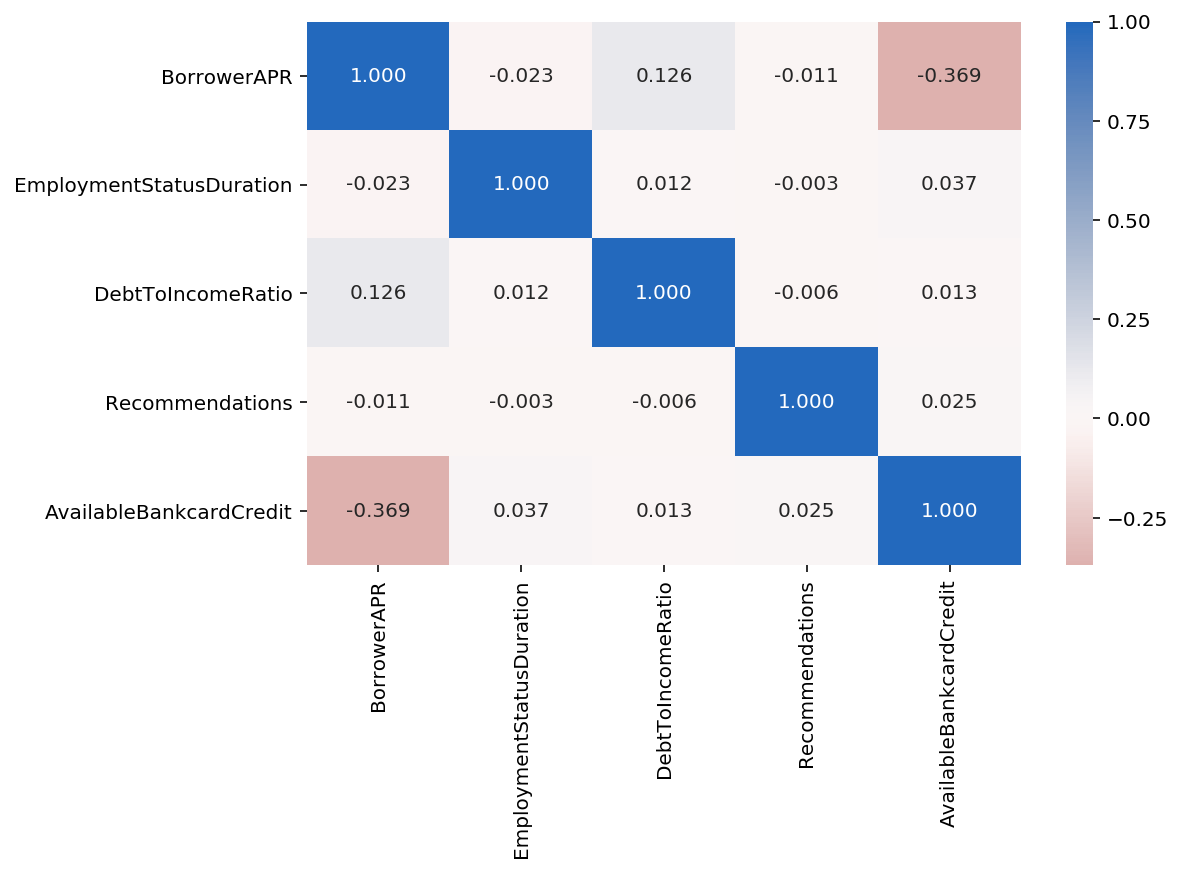

In [52]:
num_vars = ['BorrowerAPR', 'EmploymentStatusDuration', 'DebtToIncomeRatio',
            'Recommendations', 'AvailableBankcardCredit']
cat_vars = ['LoanStatus', 'EmploymentStatus', 'ProsperScore',
            'IncomeRange', 'IncomeVerifiable']

plt.figure(figsize = [8, 5])
sns.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0) 
plt.show()

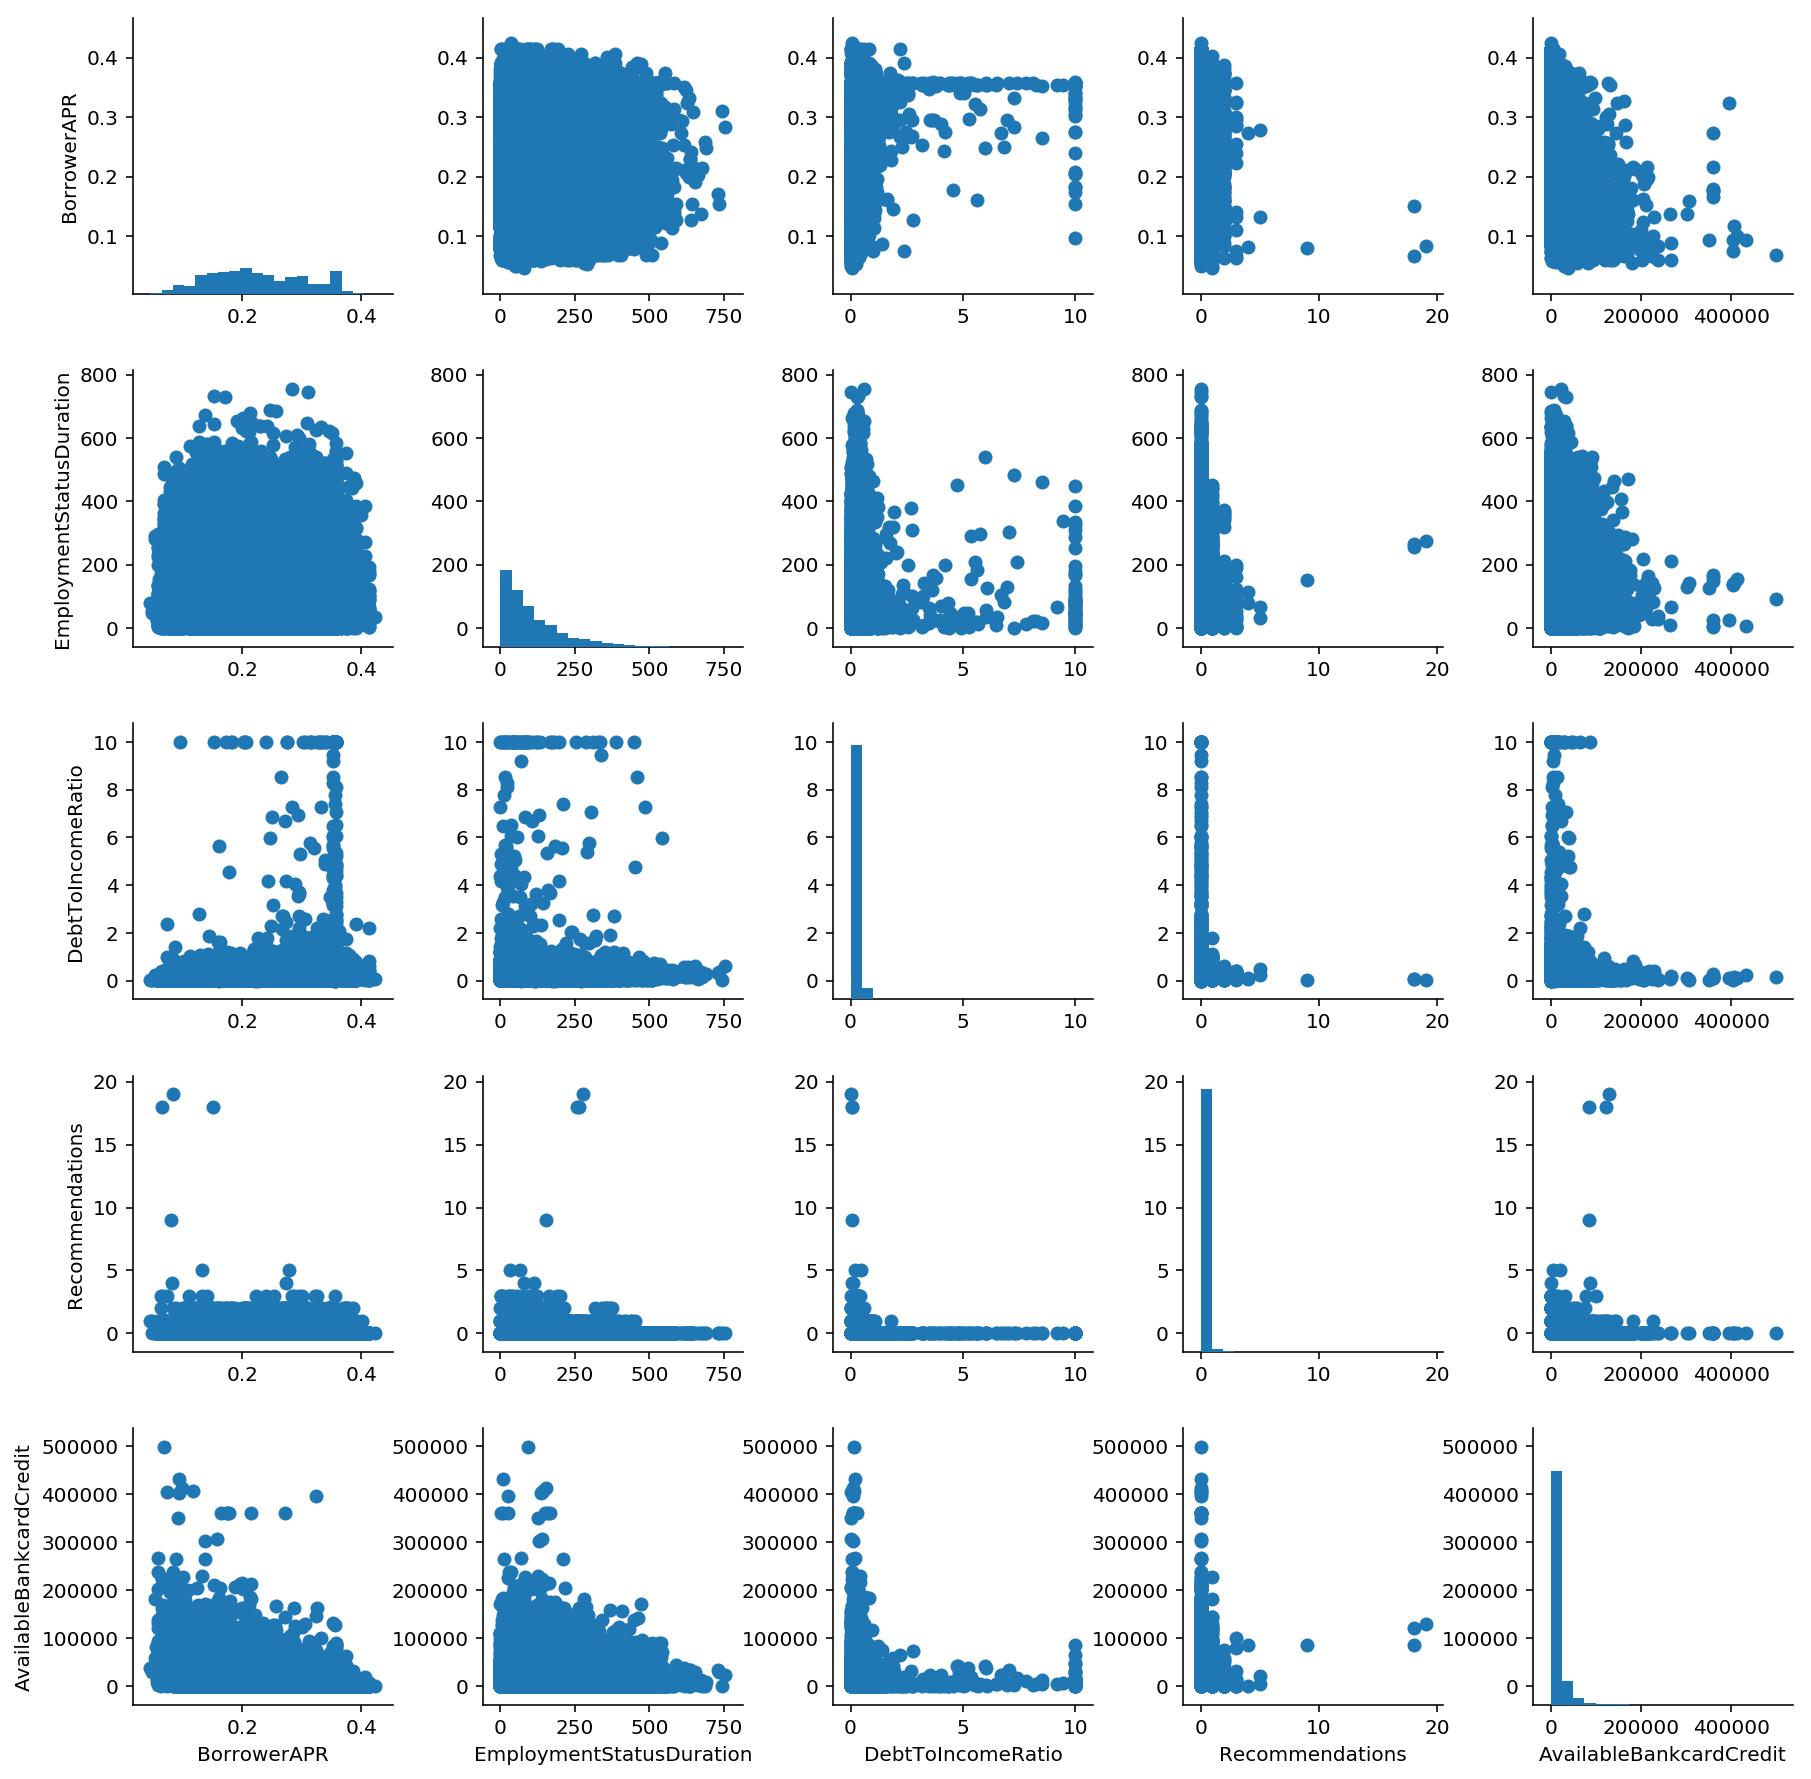

In [53]:
g = sns.PairGrid(data = loan, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

>The figures show that there are not good correlation between most features. However, the correlation between BorrowerAPR and DebtToIncomeRatio is the most positive correlation, at 0.054, and the correlation between BorrowerAPR and AvailableBankcardCredit is the most negative correlation, at -0.338

##### Qualitative Variable vs Qualitative Variable

I'll plot LoanStatus and other categorical variables to show the relationships.

##### EmploymentStatus & LoanStatus

In [54]:
ct_counts=loan.groupby(["EmploymentStatus", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="EmploymentStatus", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)
ct_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
EmploymentStatus,,,,,,,,,,,
Employed,3283.0,11814.0,46985.0,596.0,168.0,654.0,223.0,285.0,250.0,246.0,14.0
Full-time,828.0,5187.0,1242.0,228.0,10.0,27.0,7.0,13.0,11.0,12.0,0.0
Not employed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other,252.0,356.0,2726.0,43.0,8.0,38.0,11.0,25.0,11.0,16.0,0.0
Part-time,31.0,139.0,19.0,4.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0
Retired,50.0,172.0,78.0,14.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0
Self-employed,0.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


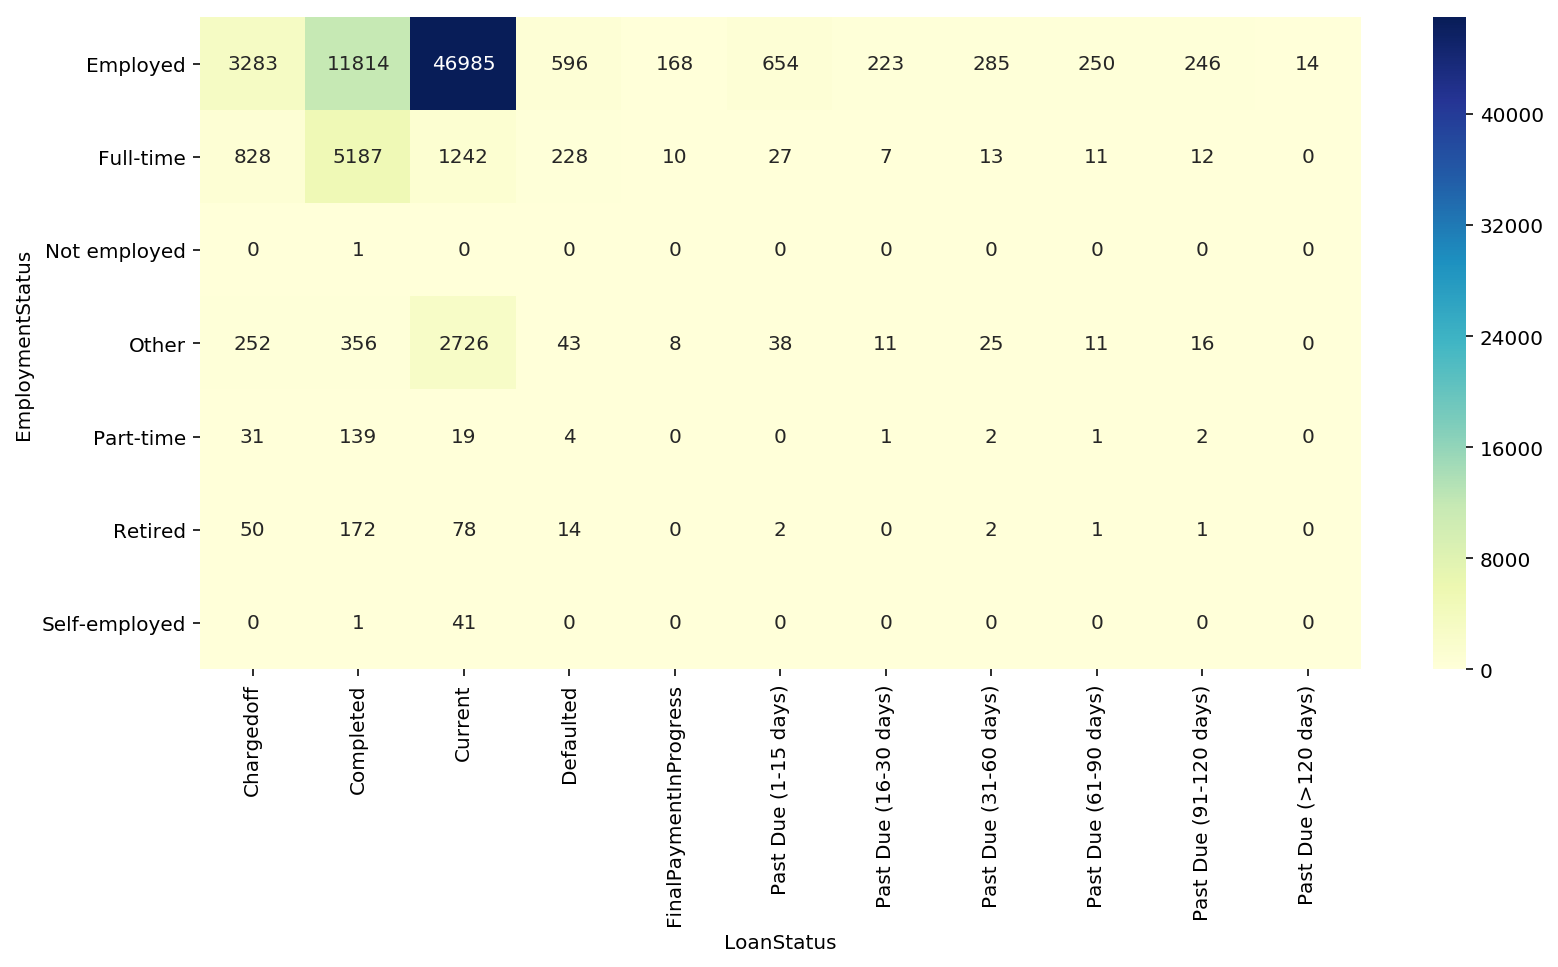

In [55]:
plt.figure(figsize = [13,6])
ax = sns.heatmap(ct_counts, annot=True, fmt=".0f", cmap="YlGnBu");

The heatmap shows that the number of borrowers with employed and full time status who currently have a loan or completed their loans is much higher than the other EmploymentStatus.

##### ProsperScore & LoanStatus

In [56]:
ct_counts=loan.groupby(["ProsperScore", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="ProsperScore", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)
ct_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
ProsperScore,,,,,,,,,,,
1.0,160.0,238.0,257.0,31.0,2.0,11.0,8.0,3.0,3.0,8.0,0.0
2.0,277.0,682.0,3562.0,61.0,23.0,75.0,31.0,38.0,39.0,31.0,2.0
3.0,303.0,896.0,5092.0,60.0,15.0,91.0,20.0,38.0,35.0,26.0,3.0
4.0,639.0,1538.0,8547.0,93.0,25.0,138.0,49.0,49.0,44.0,40.0,1.0
5.0,751.0,1913.0,5688.0,144.0,22.0,106.0,29.0,45.0,35.0,36.0,3.0
6.0,780.0,2521.0,7531.0,159.0,22.0,107.0,36.0,60.0,37.0,52.0,1.0
7.0,570.0,2175.0,6877.0,122.0,15.0,74.0,30.0,39.0,35.0,26.0,1.0
8.0,623.0,3501.0,7030.0,127.0,38.0,82.0,29.0,38.0,35.0,37.0,3.0
9.0,286.0,2671.0,3520.0,68.0,13.0,24.0,8.0,9.0,9.0,16.0,0.0


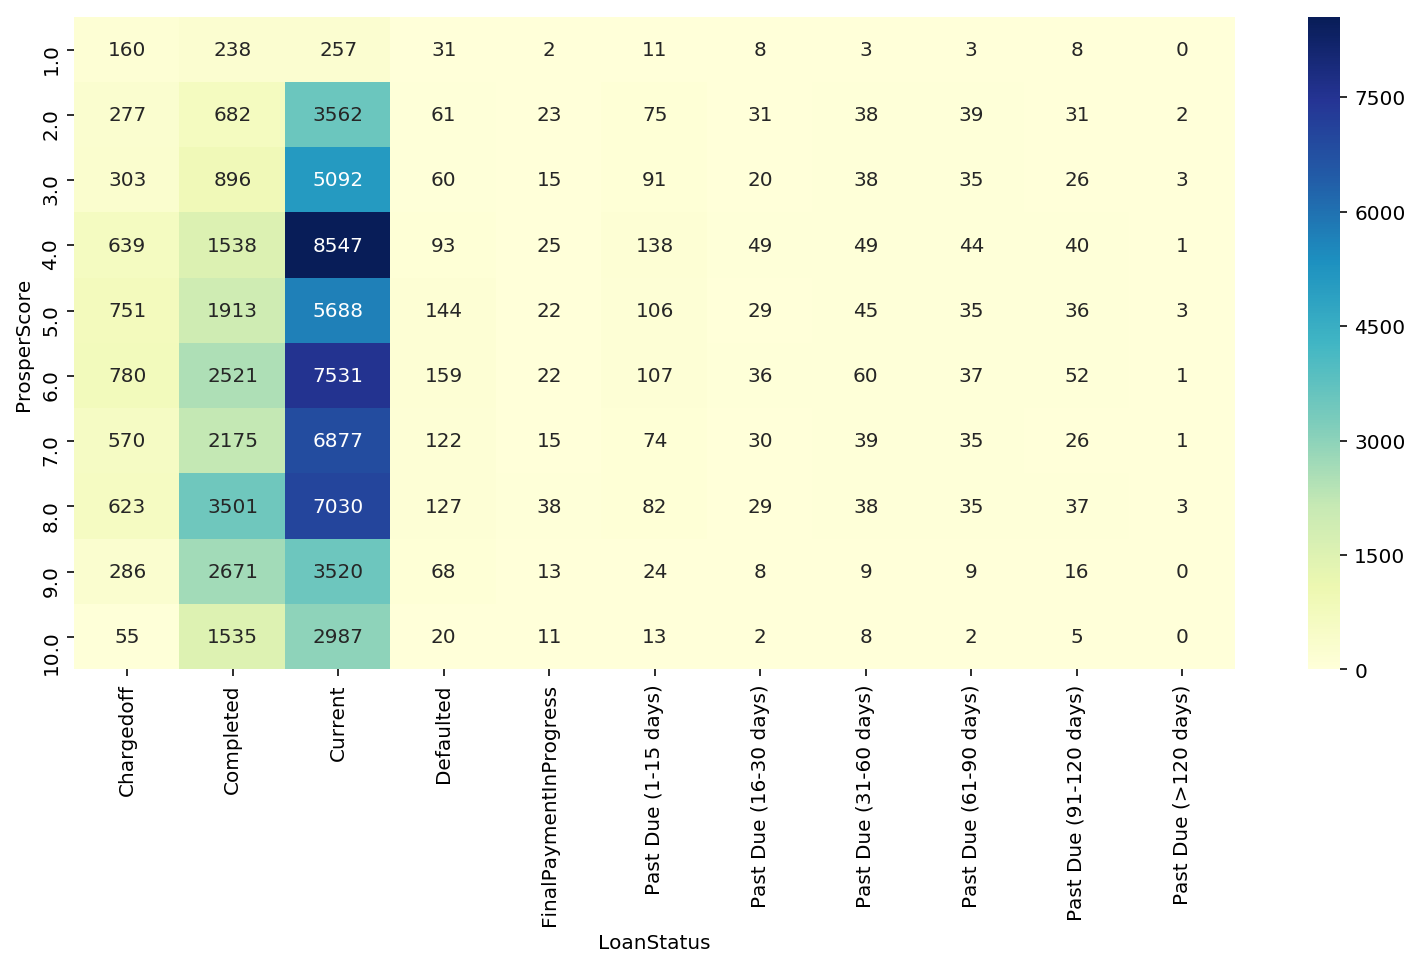

In [57]:
plt.figure(figsize = [13,6])
ax = sns.heatmap(ct_counts, annot=True, fmt=".0f", cmap="YlGnBu");

The heatmap shows that most borrowers currenly have a loan have the ProsperScore between 4 and 8.

##### IncomeRange & LoanStatus

In [58]:
ct_counts=loan.groupby(["IncomeRange", 'LoanStatus']).size().reset_index(name="count")
ct_counts=ct_counts.pivot(index="IncomeRange", columns="LoanStatus", values="count")
ct_counts.fillna(value="0", inplace=True)
ct_counts = ct_counts[ct_counts.columns].astype(float)
ct_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
IncomeRange,,,,,,,,,,,
"$1-24,999",469.0,958.0,2195.0,69.0,10.0,45.0,19.0,25.0,20.0,24.0,0.0
"$100,000+",422.0,3089.0,9497.0,61.0,46.0,120.0,35.0,62.0,34.0,24.0,0.0
"$25,000-49,999",1834.0,5170.0,13851.0,377.0,45.0,236.0,74.0,108.0,92.0,106.0,7.0
"$50,000-74,999",1190.0,5326.0,16278.0,279.0,60.0,195.0,78.0,81.0,83.0,93.0,6.0
"$75,000-99,999",529.0,3126.0,9270.0,99.0,25.0,125.0,36.0,51.0,45.0,30.0,1.0
Not employed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


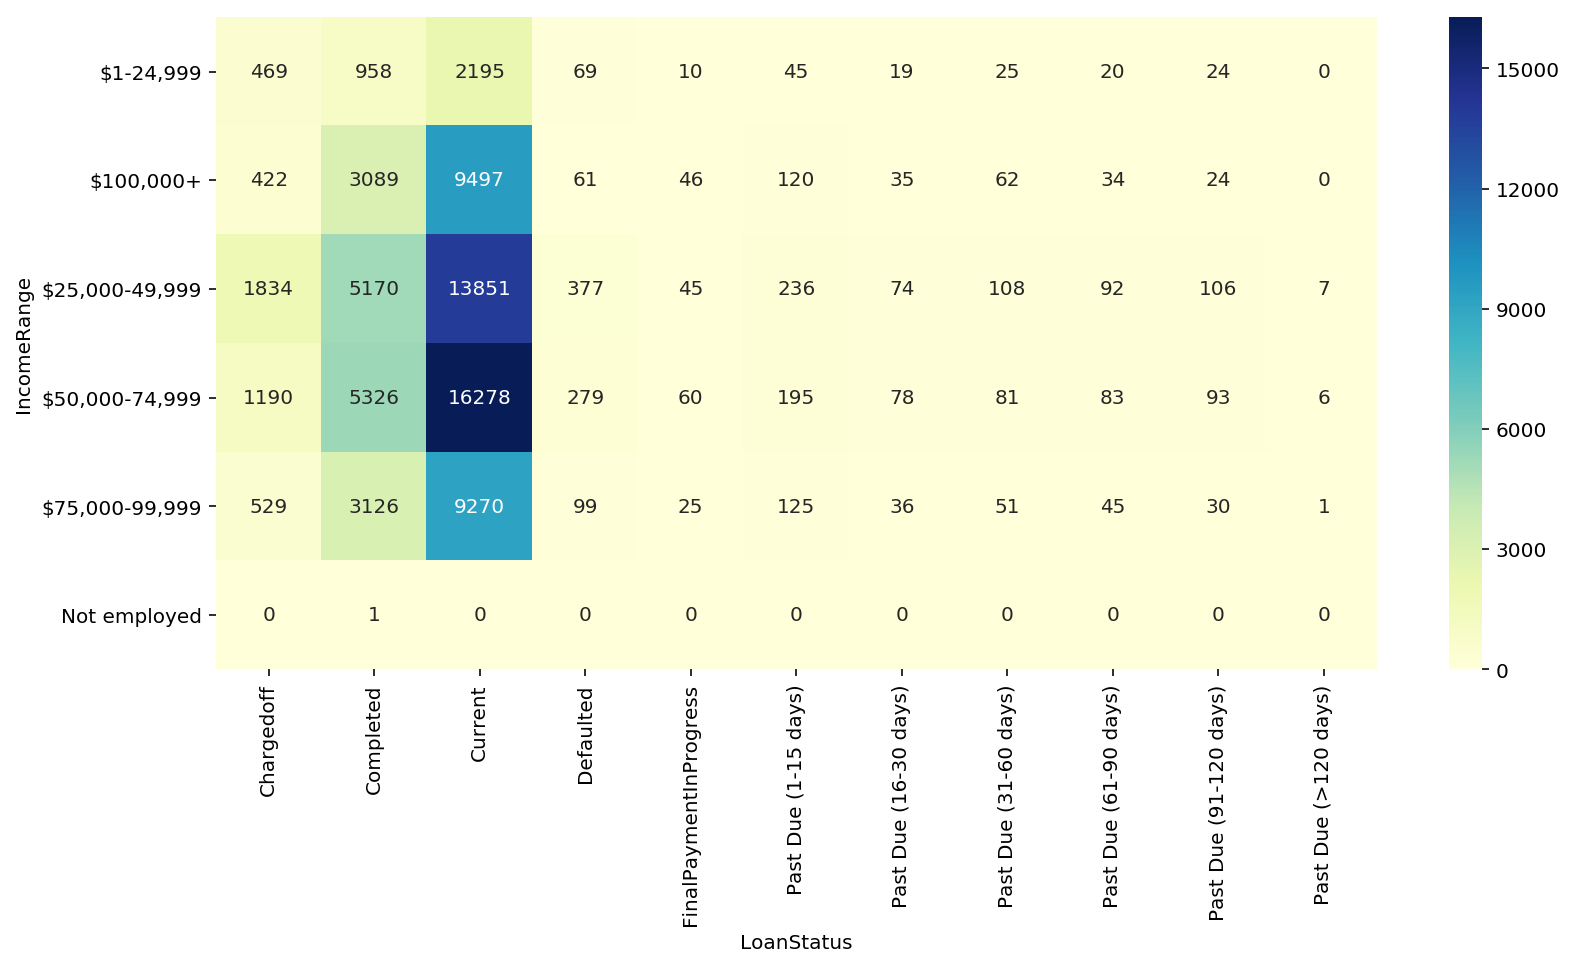

In [59]:
plt.figure(figsize = [13,6])
ax = sns.heatmap(ct_counts, annot=True, fmt=".0f", cmap="YlGnBu");

The heatmap shows that most borrowers currenly have a loan have the IncomeRange at 50,000 - 74,999 and 25,000 - 49,999 USD.

##### IncomeVerifiable & LoanStatus

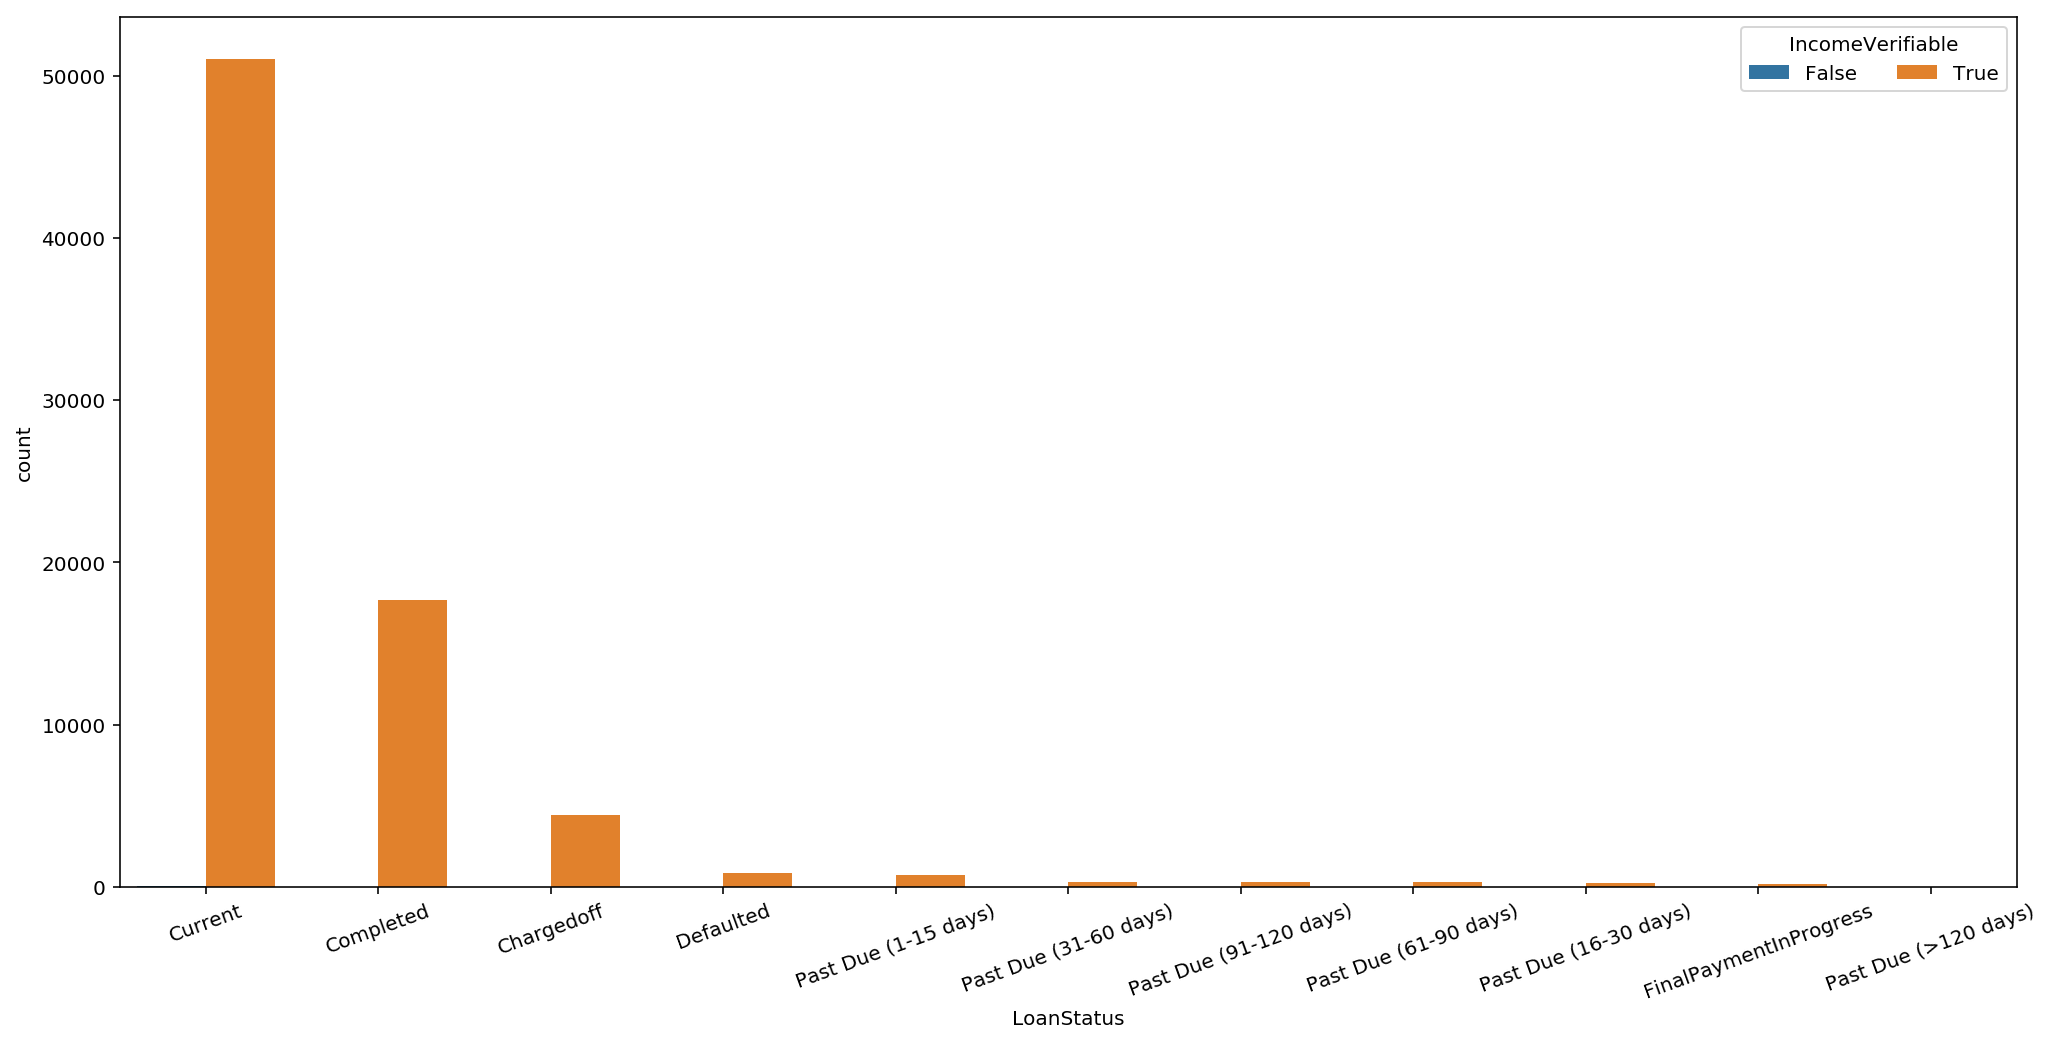

In [60]:
#plotting IncomeVerifiable against LoanStatus
plt.figure(figsize = [17,8])
#plt.style.use('fivethirtyeight')

sns.countplot(data = loan, x = 'LoanStatus', hue = 'IncomeVerifiable', order = LoanStatus_order)
plt.legend(loc = 1, ncol = 8, title = 'IncomeVerifiable')
plt.xticks(rotation = 20)
plt.xlabel('LoanStatus');

The clustered bar charts show that the most borrowers of current LoanStatus has the IncomeVerifiable, the completed is the next one.

##### Quantitative Variable vs Qualitative Variable

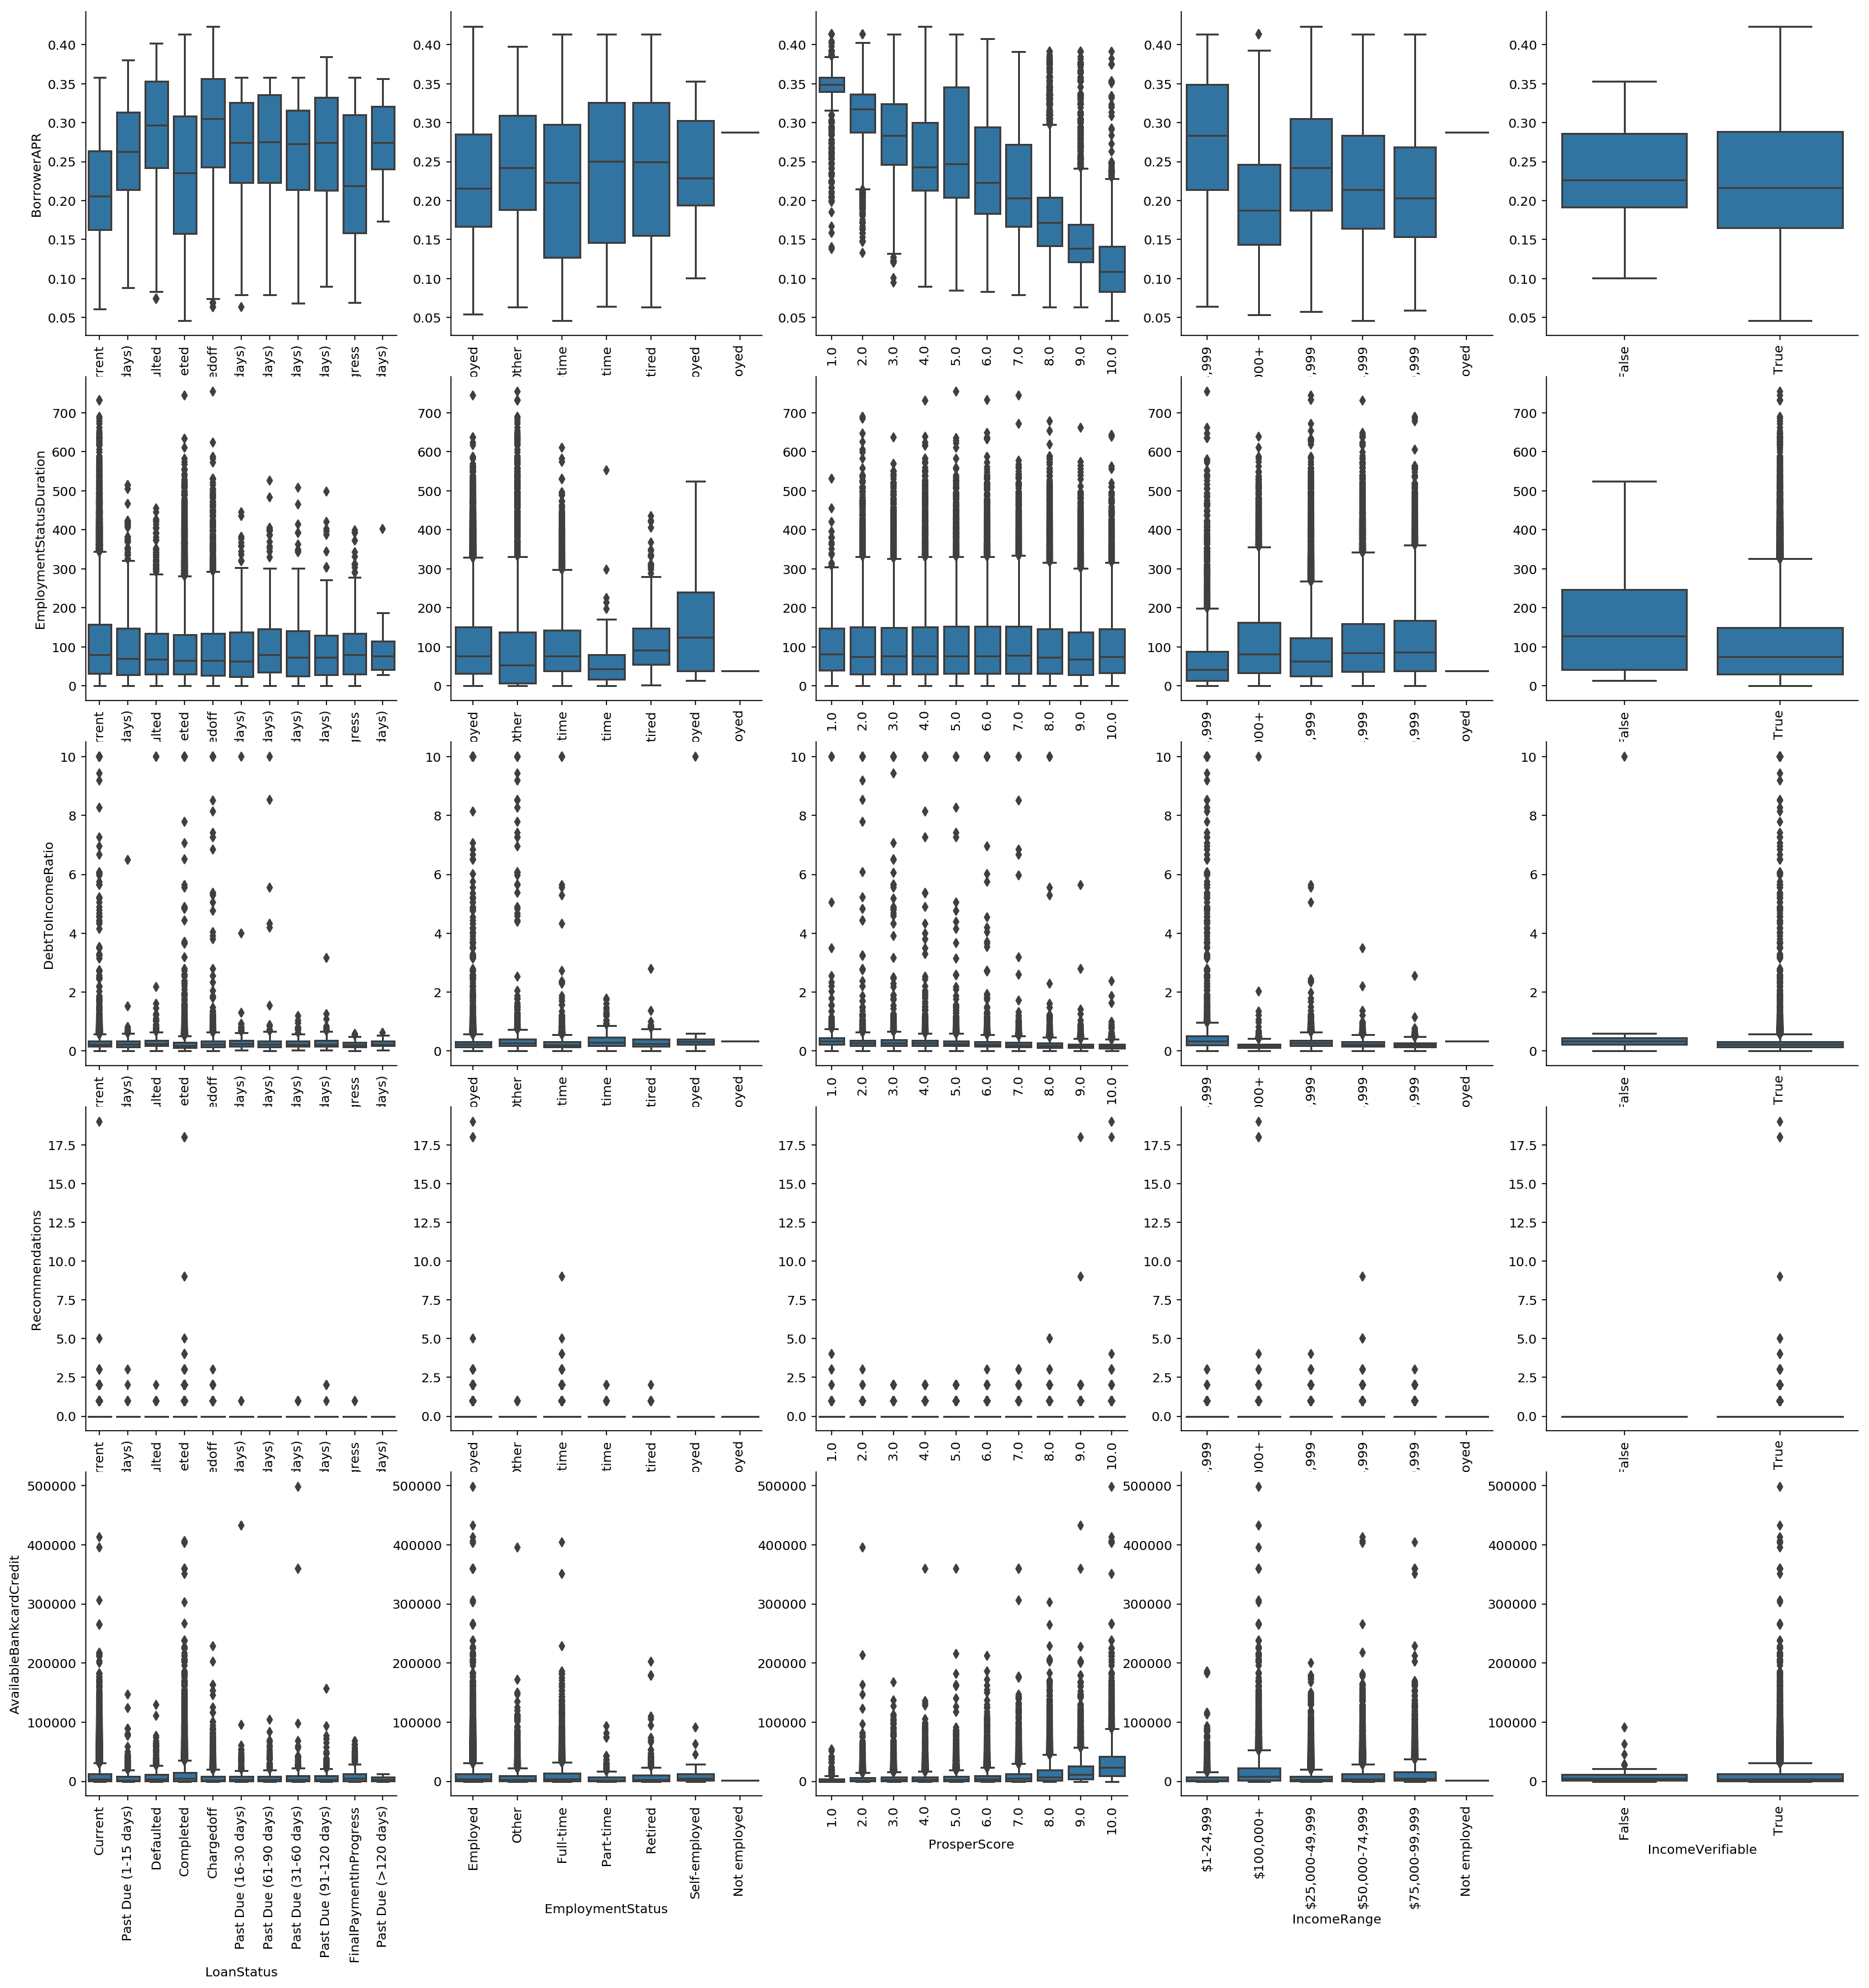

In [61]:
# plot matrix of numeric features against categorical features (exception with Occupation).

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 90 )

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan,
                 y_vars = num_vars,
                 x_vars = cat_vars ,
                 size = 4, aspect = 1)
g.map(boxgrid);
plt.show();

Let's move on to comparing with the categorical variables and BorrowerAPR in box plot.

##### LoanStatus & BorrowerAPR

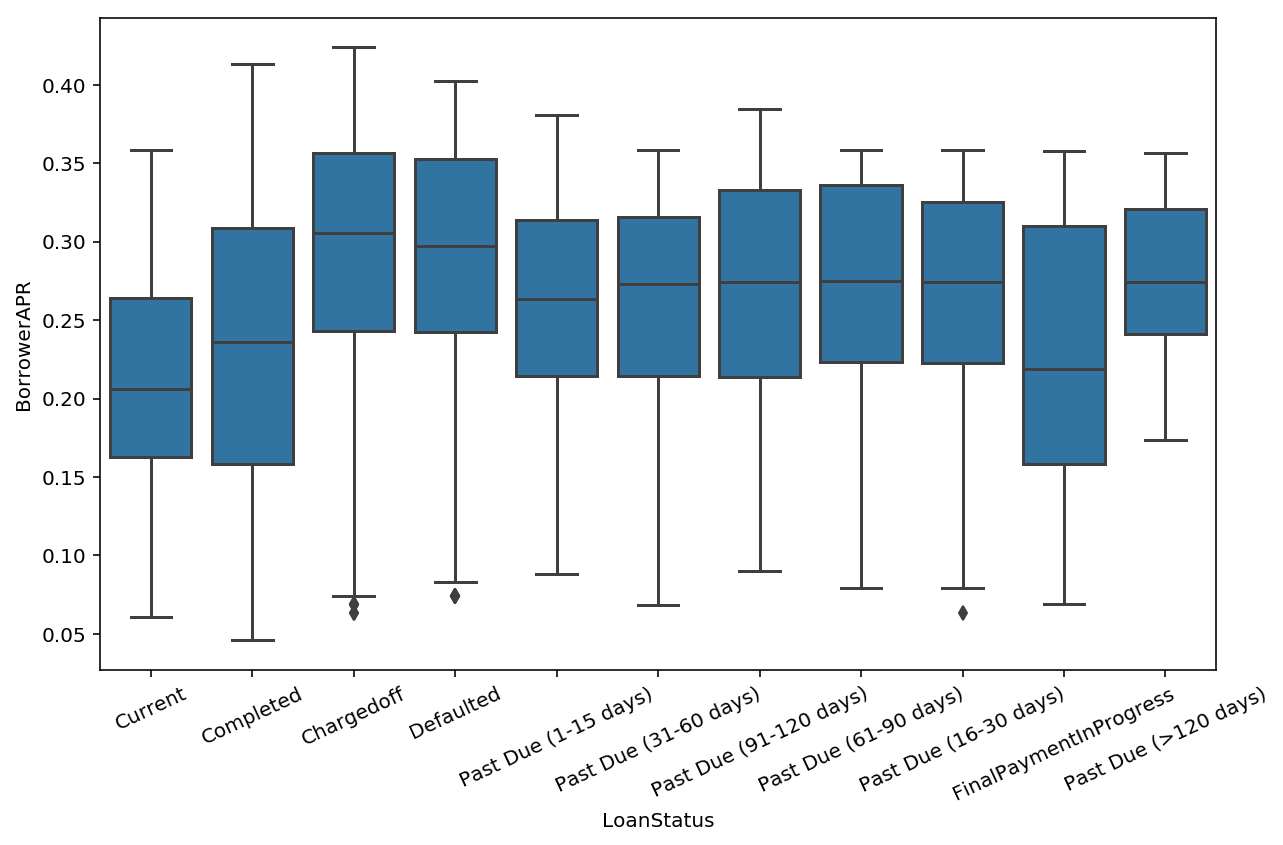

In [62]:
# plots the boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(data=loan, x='LoanStatus', y='BorrowerAPR', order=LoanStatus_order, color = base_color);

# scale the y axis with log to analyze more accurately
# plt.yscale('log')

plt.xticks(rotation=25);
plt.ylabel('BorrowerAPR');

##### EmploymentStatus & BorrowerAPR

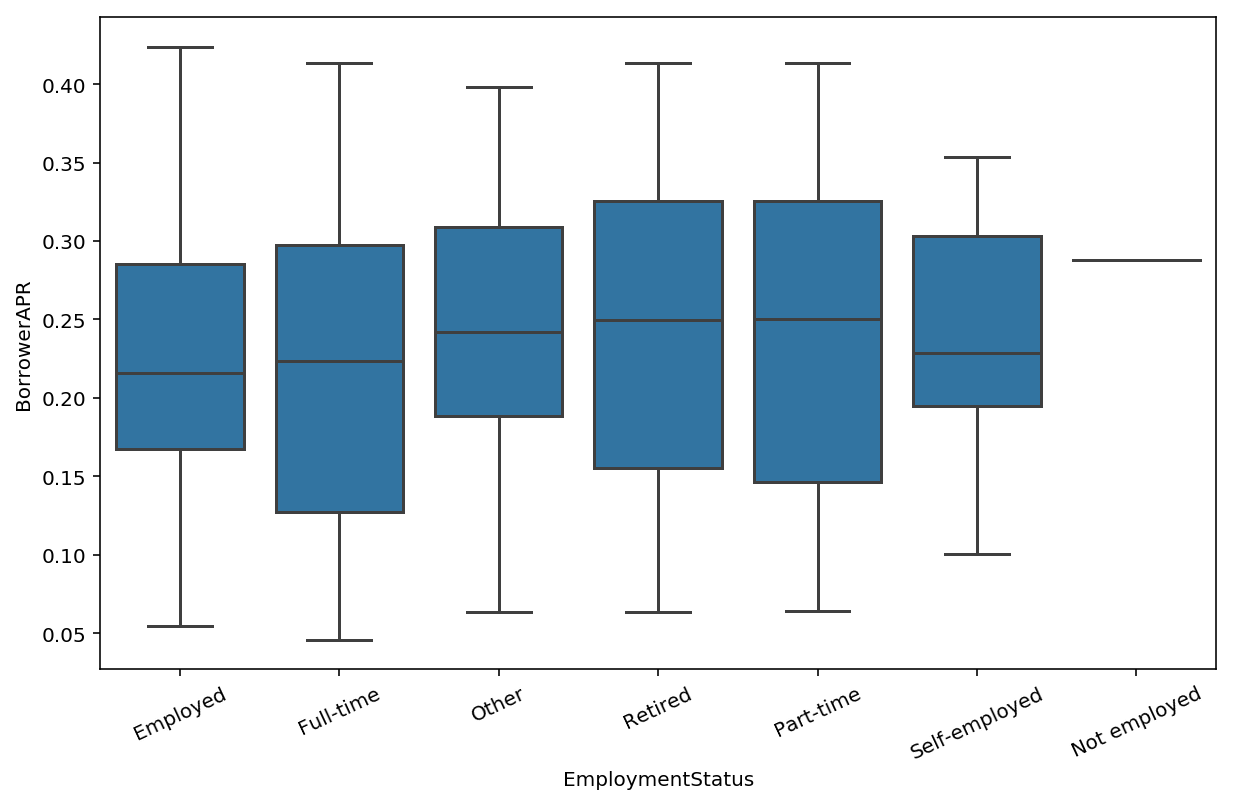

In [63]:
# plots the boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(data=loan, x='EmploymentStatus', y='BorrowerAPR', order=EmploymentStatus_order, color = base_color);

# scale the y axis with log to analyze more accurately
# plt.yscale('log')

plt.xticks(rotation=25);
plt.ylabel('BorrowerAPR');

##### ProsperScore & BorrowerAPR

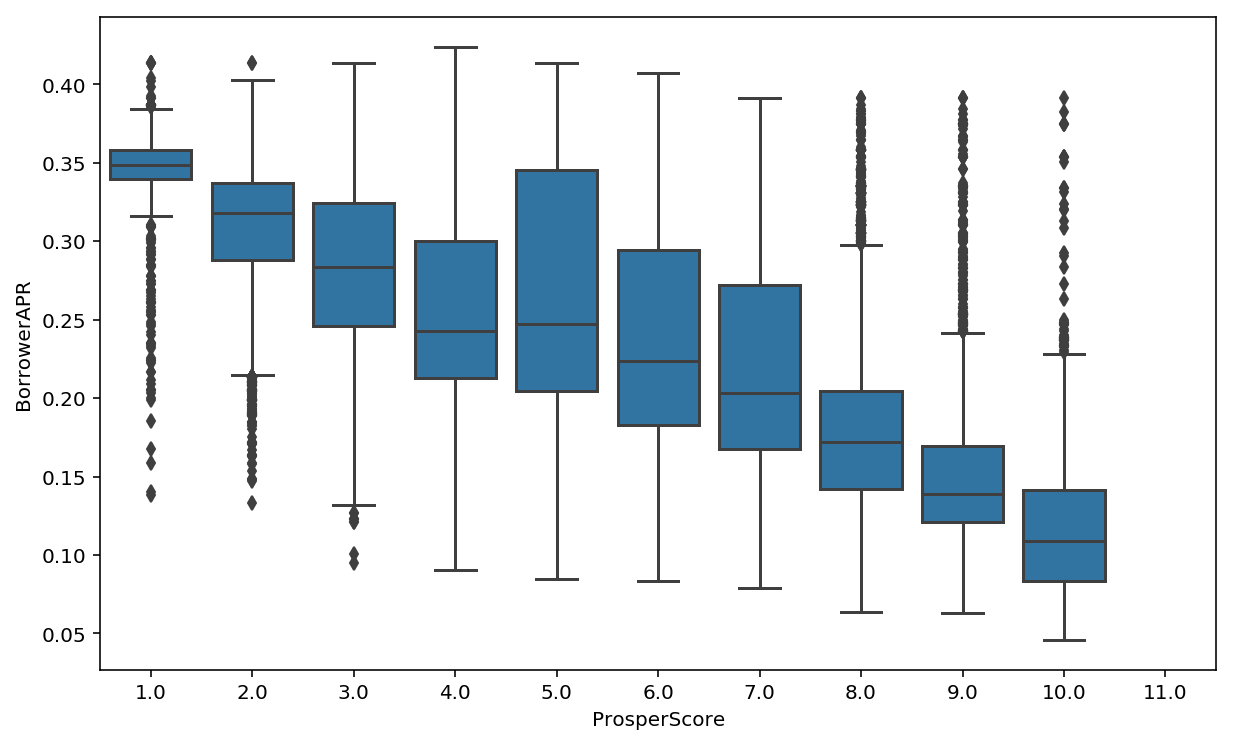

In [64]:
# plots the boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', order=ProsperScore_order, color = base_color);

# scale the y axis with log to analyze more accurately
# plt.yscale('log')

#plt.xticks(rotation=25);
plt.ylabel('BorrowerAPR');

##### IncomeRange & BorrowerAPR

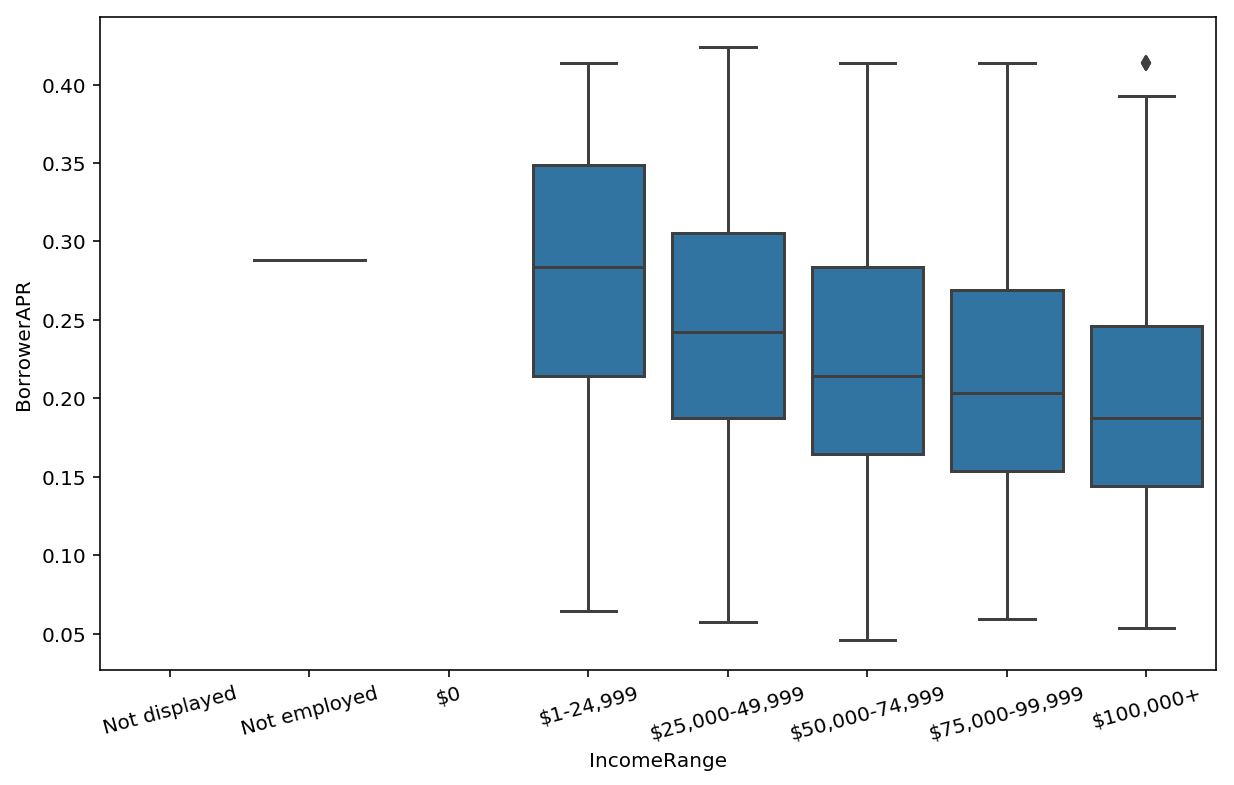

In [65]:
# plots the boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(data=loan, x='IncomeRange', y='BorrowerAPR', order=IncomeRange_order, color = base_color);

# scale the y axis with log to analyze more accurately
# plt.yscale('log')

plt.xticks(rotation=15);
plt.ylabel('BorrowerAPR');

##### IncomeVerifiable & BorrowerAPR

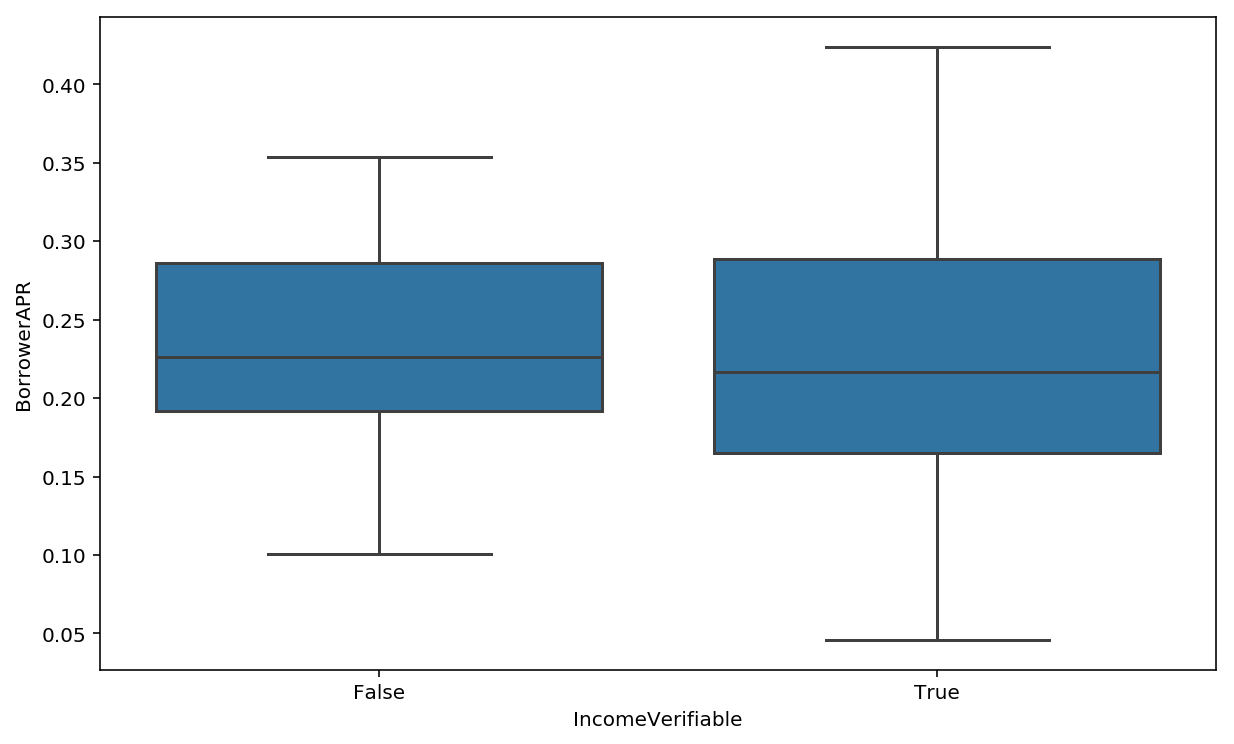

In [66]:
# plots the boxplot
plt.figure(figsize=[10, 6])
sns.boxplot(data=loan, x='IncomeVerifiable', y='BorrowerAPR', color = base_color);

# scale the y axis with log to analyze more accurately
# plt.yscale('log')

#plt.xticks(rotation=15);
plt.ylabel('BorrowerAPR');

The figures show that the BorrowerAPR is decreased with the better of ProsperScore, more IncomeRange (with exception of not displayed, not employed and 0 dollar) and having IncomeVerifiable. It can describes that the ProsperScore and IncomeRange have a correlation with BorrowerAPR. Borrowers with better rating also have larger monthly income and loan amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The BorrowerAPR is negatively associated with the ProsperScore, which mean the lower risk score (with 10 being the best, or lowest risk score), the lower BorrowerAPR. It also shows that at the higher IncomeRange rusults in the lower BorrowerAPR, and the AvailableBankcardCredit is the most negative correlation with BorrowerAPR, at -0.338.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most of borrowers who current their loans was employed, most borrowers currenly have a loan or have the ProsperScore between 4 and 8, most borrowers currenly have a loan have the IncomeRange at 50,000 - 74,999 and 25,000 - 49,999 USD and the most borrowers of current LoanStatus has the IncomeVerifiable, the completed, chargeoff and default is the next one.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the features are affected the relationship of BorrowerRate.

##### Starting with how IncomeRange affect the ProsperScore and BorrowerRate.

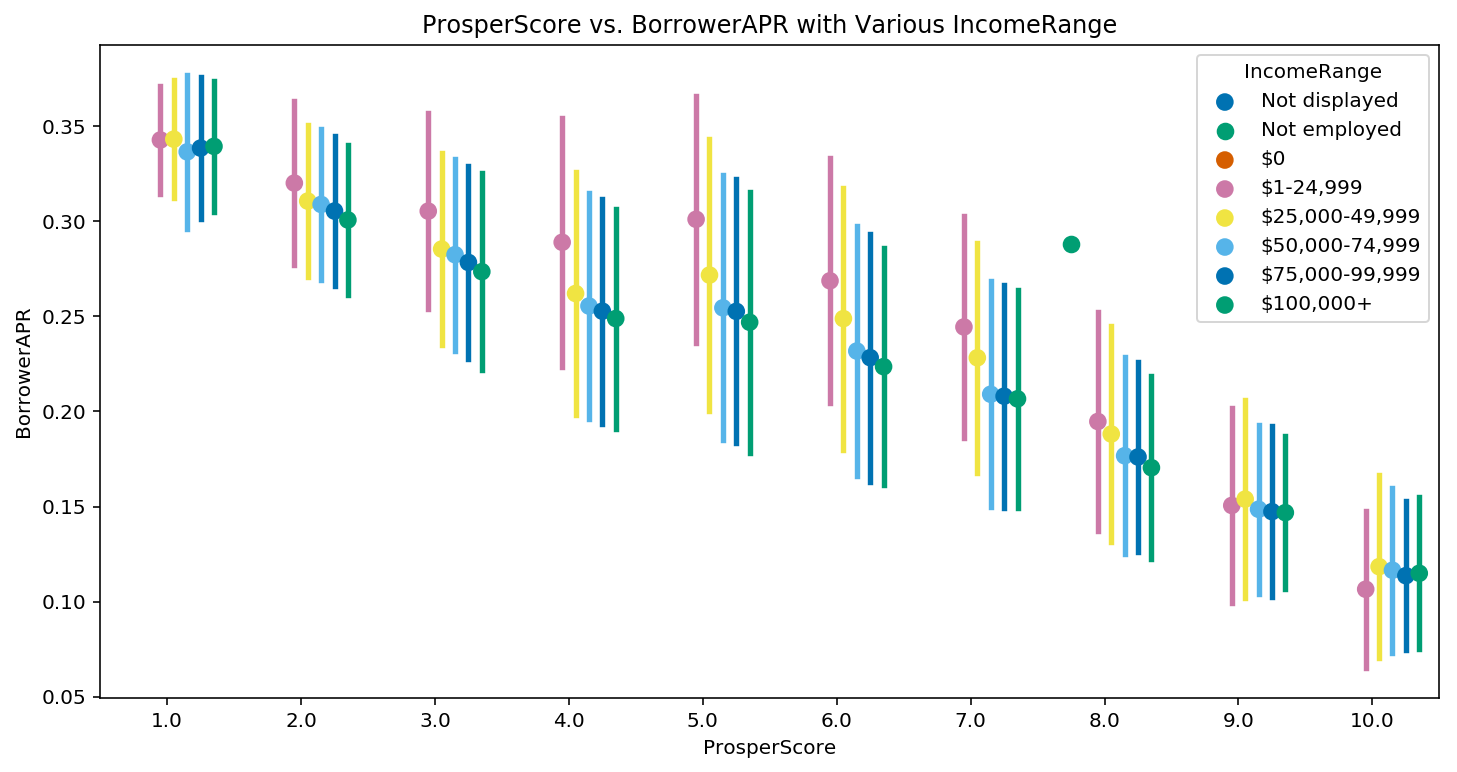

In [67]:
fig = plt.figure(figsize = [12,6])
ax = sns.pointplot(data = loan, x = 'ProsperScore', y = 'BorrowerAPR', hue = 'IncomeRange', hue_order=IncomeRange_order, linestyles = '', dodge = 0.7, ci="sd", palette = 'colorblind')
plt.title('ProsperScore vs. BorrowerAPR with Various IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR')
plt.show();

In common, increasing ProsperScore decreases BorrowerRate. In conclusion, borrowers with lower IncomeRange have higher BorrowerRate at each individual ProsperScore.

#####  How LoanStatus affect the ProsperScore and BorrowerRate.

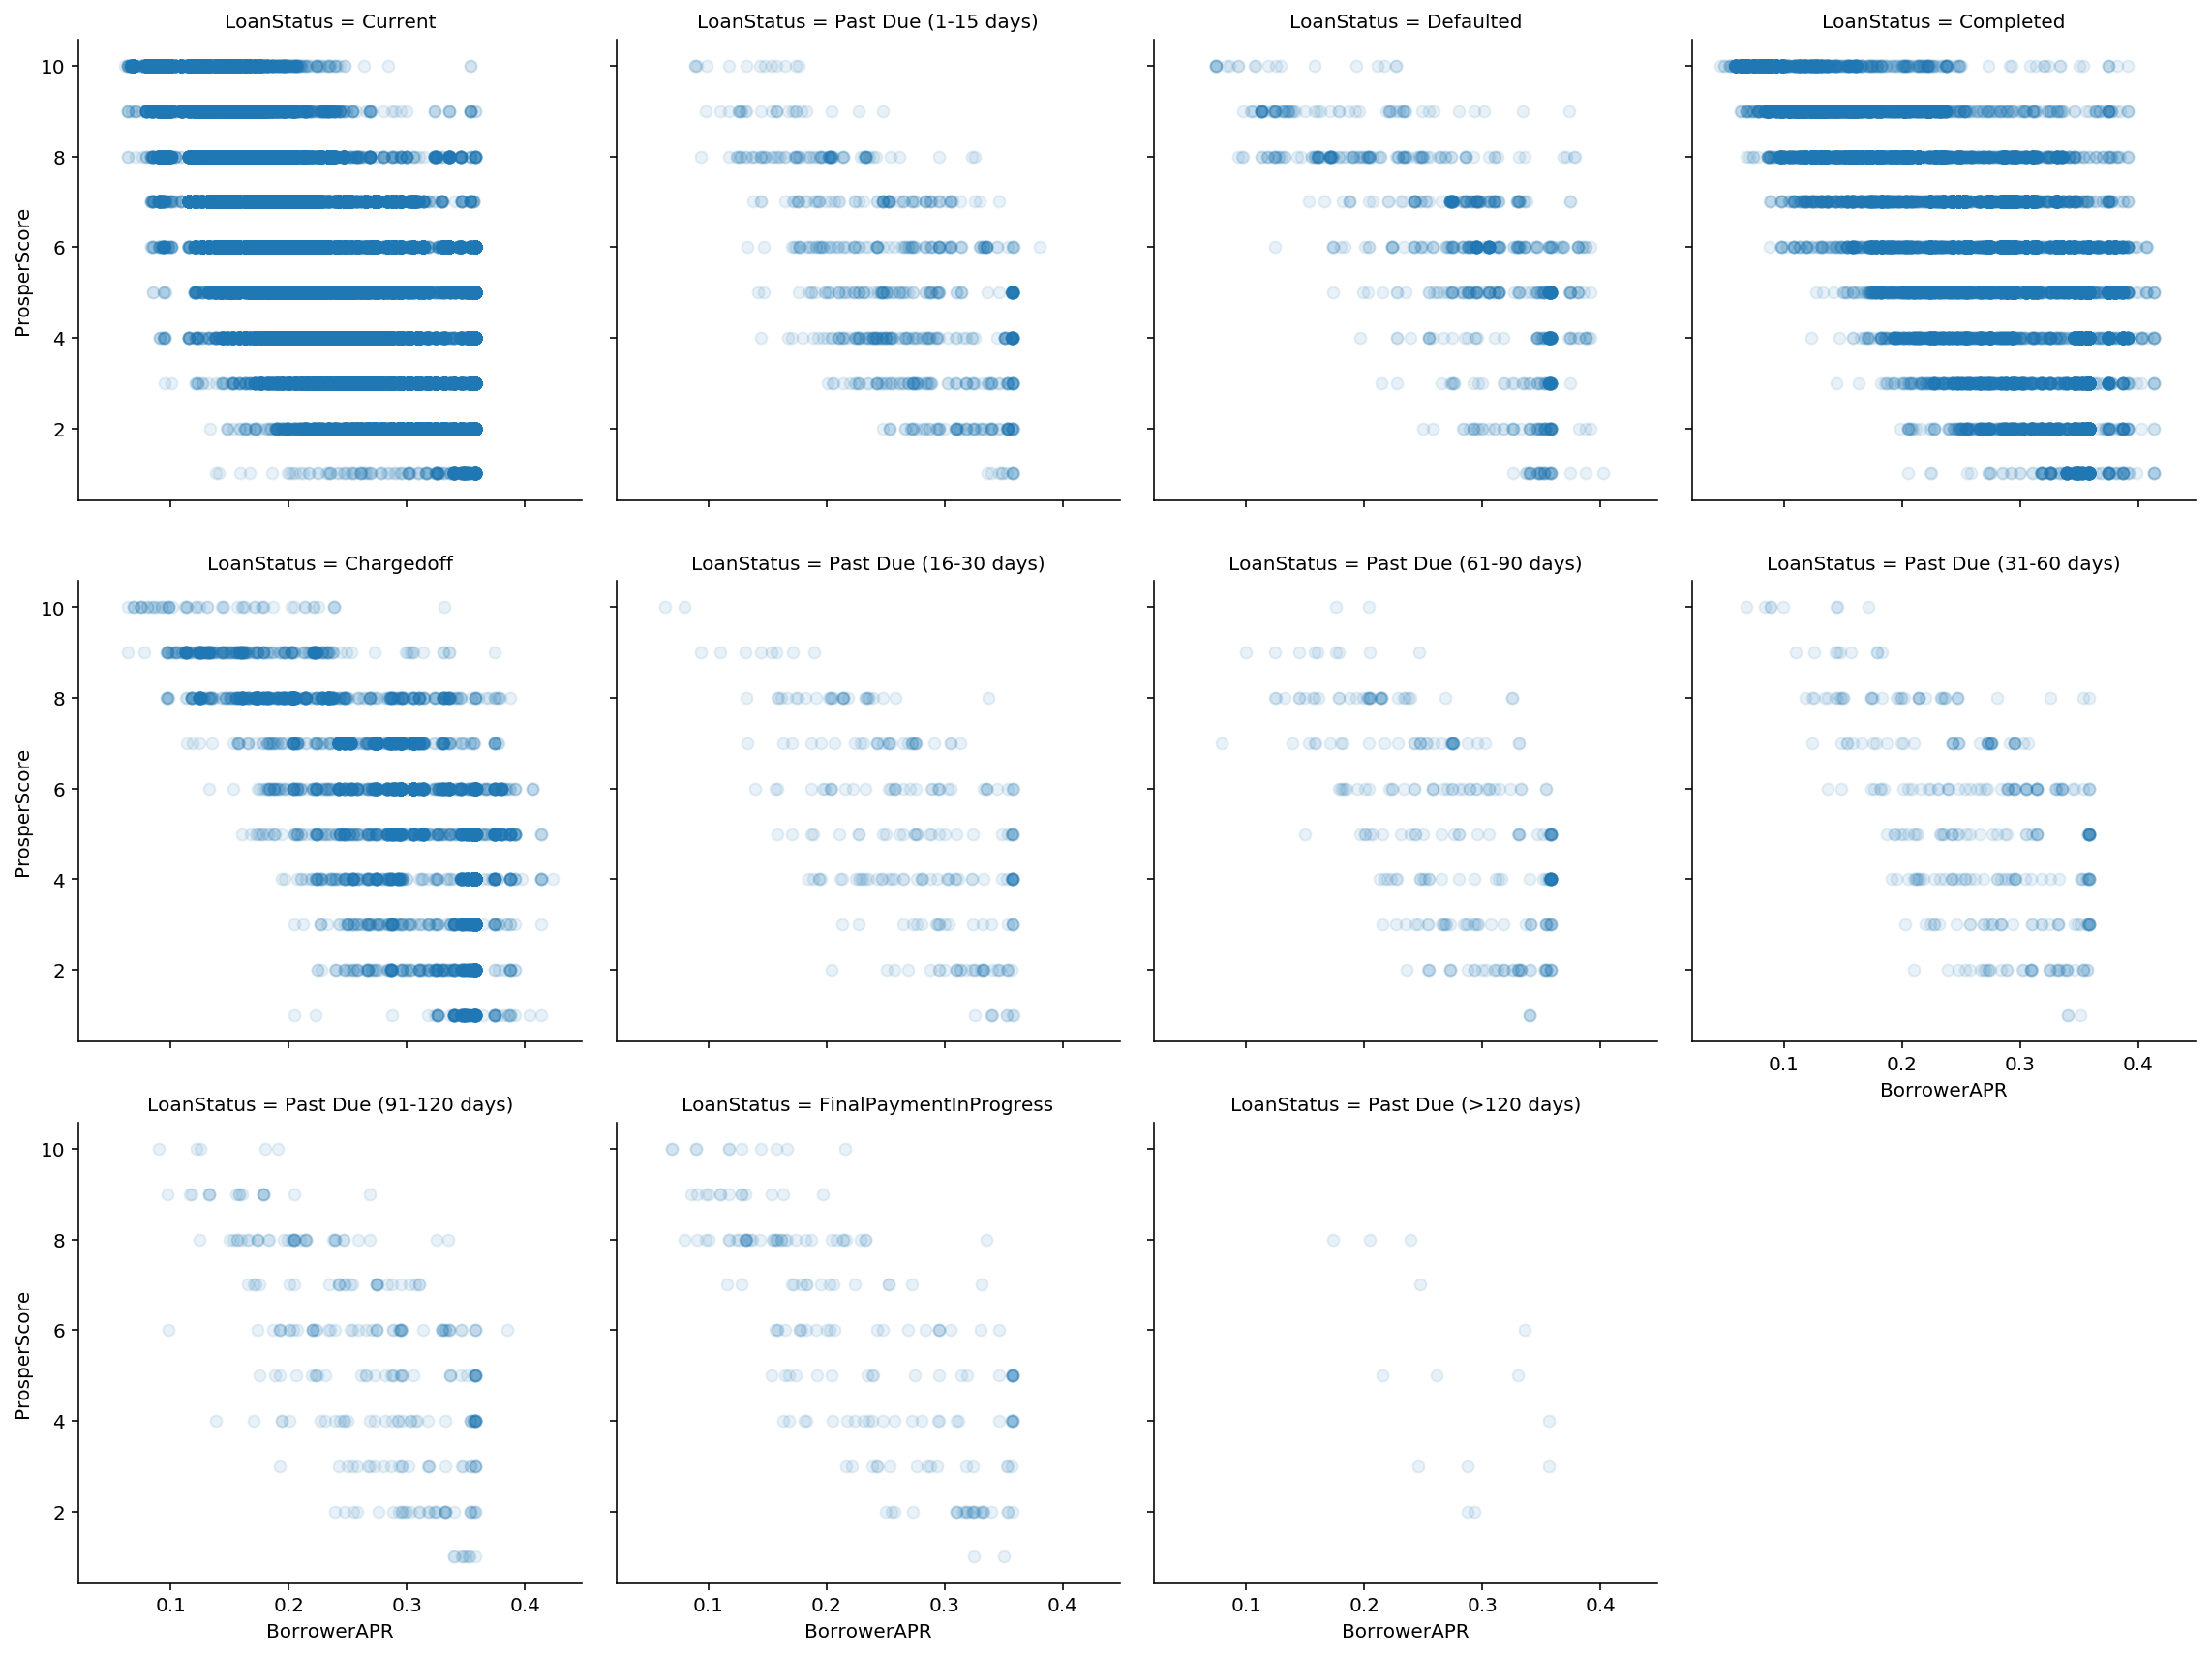

In [70]:
g = sns.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 4, size = 4)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

This figures help to analyze BorrowerAPR vs ProsperScore on difference LoanStatus. The patterns show that the low ProsperScore cause high BorrowerAPR in every LoanStatus. In summarize, LoanStatus doesn't much affect of the ProsperScore and BorrowerRate.

##### BorrowerRate vs. AvailableBankcardCredit & ProsperScore

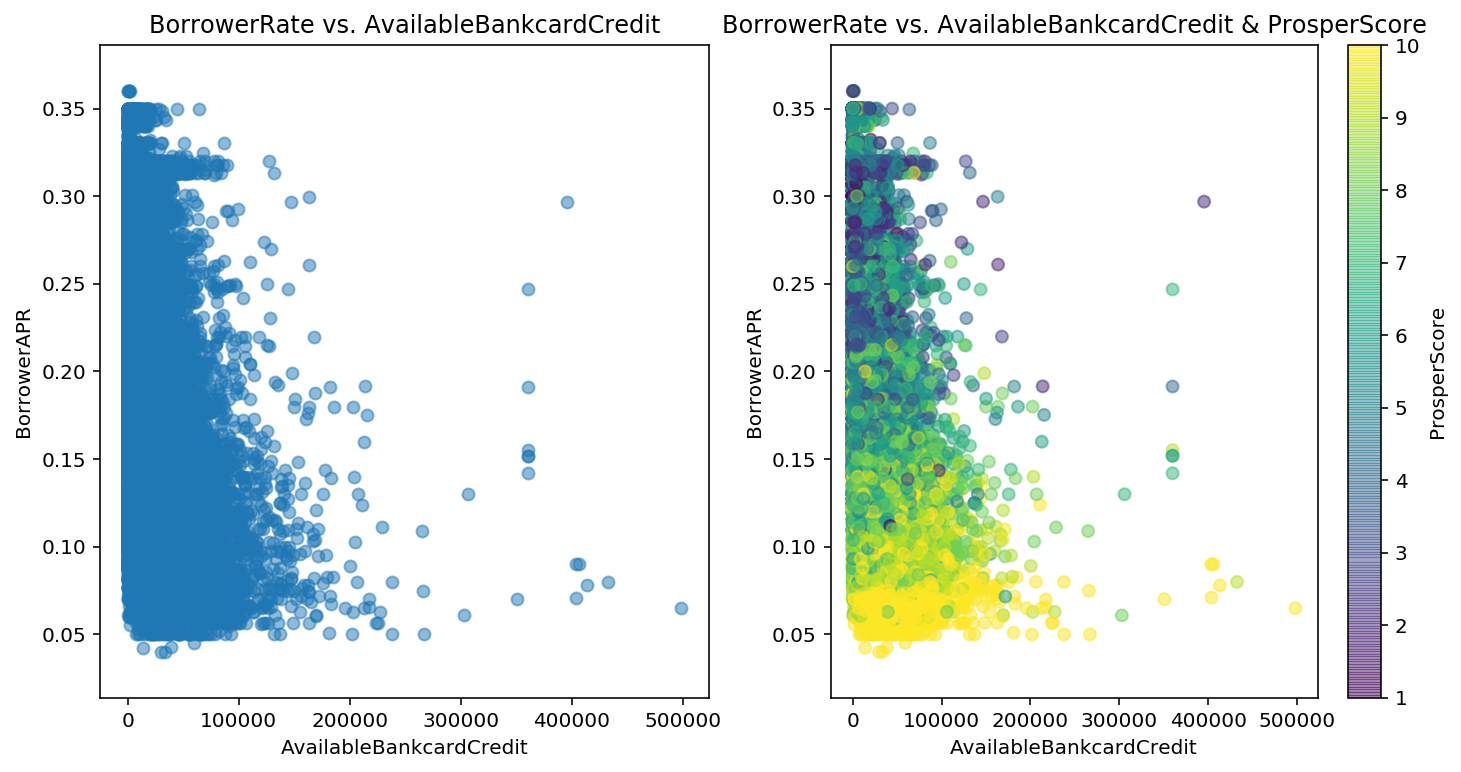

In [71]:
plt.figure(figsize = [12, 6]) 

plt.subplot(1, 2, 1)
plt.scatter(data = loan, x = 'AvailableBankcardCredit', y = 'BorrowerRate', alpha = 0.5)
plt.title('BorrowerRate vs. AvailableBankcardCredit')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('BorrowerAPR');

plt.subplot(1, 2, 2)
plt.scatter(data = loan, x = 'AvailableBankcardCredit', y = 'BorrowerRate', c ='ProsperScore', alpha = 0.5)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerRate vs. AvailableBankcardCredit & ProsperScore')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('BorrowerAPR');

We can see the AvailableBankcardCredit decrease as BorrowerAPR in the figures. If we look at the ProsperScore, it shows that the high ProsperScore(low risk) has a low BorrowerAPR and more range of AvailableBankcardCredit, on the other hand, the low ProsperScore has a high BorrowerAPR and the most of low AvailableBankcardCredit has a low AvailableBankcardCredit and BorrowerAPR. It can be seen that AvailableBankcardCredit and ProsperScore negatively correlated to BorrowerAPR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- Normally, people with lower IncomeRange have higher BorrowerAPR at each individual ProsperScore.
>
>- LoanStatus does not affect the BorrowerAPR and LoanOriginalAmount relationship.
>
>- AvailableBankcardCredit and ProsperScore negatively correlated to BorrowerAPR. The high ProsperScore has a low BorrowerAPR and more range of AvailableBankcardCredit. In contrast, the most of low AvailableBankcardCredit has a low BorrowerAPR and BorrowerAPR.


### Were there any interesting or surprising interactions between features?

> The Past Due in LoanStatus is none that has BorrowerRate greater than 0.4, on the other hand, Completed and Chargedoff have.